# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


# BO1 Strats from here 

# Buisness Understanding 

# Dataset Description

# NSL-KDD 
is a data set suggested to solve some of the inherent problems of the KDD'99 data set. Although, this new version of the KDD data set still suffers from some of the problems, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods.

Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

# Data files

### KDDTrain+.ARFF: The full NSL-KDD train set with binary labels in ARFF format
### KDDTrain+.TXT: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format
### KDDTrain+_20Percent.ARFF: A 20% subset of the KDDTrain+.arff file
### KDDTrain+_20Percent.TXT: A 20% subset of the KDDTrain+.txt file
### KDDTest+.ARFF: The full NSL-KDD test set with binary labels in ARFF format
### KDDTest+.TXT: The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
### KDDTest-21.ARFF: A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
### KDDTest-21.TXT: A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21

# Dataset Loading

In [2]:
dataset_train=pd.read_csv('KDDTrain+.txt')

In [3]:
dataset_test=pd.read_csv('KDDTest+.txt')

# Sample view of the training dataset

In [4]:
dataset_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


# Sample view of the test dataset

In [5]:
dataset_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


# Columns Name of Training and Test dataset

In [6]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

# Shape of Training and Test Datasets

In [7]:
print("Shape of Training Dataset:", dataset_train.shape)
print("Shape of Testing Dataset:", dataset_test.shape)

Shape of Training Dataset: (125972, 43)
Shape of Testing Dataset: (22543, 43)


# Columns Assignement

In [8]:
# Assigning attribute name to dataset
dataset_train = pd.read_csv("KDDTrain+.txt", header=None, names = col_names)
dataset_test = pd.read_csv("KDDTest+.txt", header=None, names = col_names)

In [9]:
dataset_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [10]:
# remove attribute 'difficulty_level'
dataset_train.drop(['difficulty_level'],axis=1,inplace=True)
dataset_train.shape

(125973, 42)

In [11]:
# remove attribute 'difficulty_level'
dataset_test.drop(['difficulty_level'],axis=1,inplace=True)
dataset_test.shape

(22544, 42)

# Label Description of training and test dataset

In [12]:
#label distribution of Training set and testing set
print('Label distribution Training set:')
print(dataset_train['label'].value_counts())
print()
print('Label distribution Test set:')
print(dataset_test['label'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


In [13]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [14]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

# Data preprocessing

One-Hot-Encoding (one-of-K) is used to to transform all categorical features into binary features. Requirement for One-Hot-encoding: "The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. The output will be a sparse matrix where each column corresponds to one possible value of one feature. It is assumed that input features take on values in the range [0, n_values)."

Therefore the features first need to be transformed with LabelEncoder, to transform every category to a number


# Identify categorical features¶

In [15]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in dataset_train.columns:
    if dataset_train[col_name].dtypes == 'object' :
        unique_cat = len(dataset_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(dataset_train['service'].value_counts().sort_values(ascending=False).head())


Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [16]:
# Test set
print('Test set:')
for col_name in dataset_test.columns:
    if dataset_test[col_name].dtypes == 'object' :
        unique_cat = len(dataset_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


### Conclusion: Need to make dummies for all categories as the distribution is fairly even. In total: 3+70+11=84 dummies.
### Comparing the results shows that the Test set has fewer categories (6), these need to be added as empty columns.

# DataEncoding

### Insert categorical features into a 2D numpy array


In [17]:
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
dataset_train_categorical_values = dataset_train[categorical_columns]
dataset_test_categorical_values = dataset_test[categorical_columns]

In [18]:
dataset_train_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


# Dummy Columns

In [19]:
# protocol type
unique_protocol=sorted(dataset_train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(dataset_train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(dataset_train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(dataset_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

# Transform categorical features into numbers using LabelEncoder()

In [20]:
#Transform categorical features into numbers using LabelEncoder()
dataset_train_categorical_values_enc=dataset_train_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_train_categorical_values_enc.head())
# test set
dataset_test_categorical_values_enc=dataset_test_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


# One-Hot-Encoding

In [21]:
#One-Hot-Encoding¶
enc = OneHotEncoder()
dataset_train_categorical_values_encenc = enc.fit_transform(dataset_train_categorical_values_enc)
dataset_train_cat_data = pd.DataFrame(dataset_train_categorical_values_encenc.toarray(),columns=dumcols)
# test set
dataset_test_categorical_values_encenc = enc.fit_transform(dataset_test_categorical_values_enc)
dataset_test_cat_data = pd.DataFrame(dataset_test_categorical_values_encenc.toarray(),columns=testdumcols)

In [22]:
dataset_train_cat_data.shape

(125973, 84)

In [23]:
dataset_test_cat_data.shape

(22544, 78)

# Add 6 missing categories from train set to test set

In [24]:
trainservice=dataset_train['service'].tolist()
testservice= dataset_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference


['service_http_8001',
 'service_harvest',
 'service_http_2784',
 'service_red_i',
 'service_aol',
 'service_urh_i']

In [25]:
for col in difference:
    dataset_test_cat_data[col] = 0

dataset_test_cat_data.shape

(22544, 84)

# Join encoded categorical dataframe with the non-categorical dataframe

In [26]:
#Join encoded categorical dataframe with the non-categorical dataframe
newdf=dataset_train.join(dataset_train_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=dataset_test.join(dataset_test_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [27]:
newdf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,8,105,145,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Split Dataset into 4 datasets for every attack category
## Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
## Replace labels column with new labels column
## Make new datasets


In [28]:
# take label column
labeldf=newdf['label']
labeldf_test=newdf_test['label']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [29]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['label'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['label'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


### ~newdf['label'].isin(to_drop_DoS) ==> the tilde negates the Boolean values in the DataFrame: True becomes False and False becomes True .


#  Feature Scaling:¶


In [30]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('label',1)
Y_DoS = DoS_df.label

X_Probe = Probe_df.drop('label',axis=1)
Y_Probe = Probe_df.label

X_R2L = R2L_df.drop('label',1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label',1)
Y_U2R = U2R_df.label
# test set
X_DoS_test = DoS_df_test.drop('label',1)
Y_DoS_test = DoS_df_test.label
X_Probe_test = Probe_df_test.drop('label',1)
Y_Probe_test = Probe_df_test.label
X_R2L_test = R2L_df_test.drop('label',1)
Y_R2L_test = R2L_df_test.label
X_U2R_test = U2R_df_test.drop('label',1)
Y_U2R_test = U2R_df_test.label

# Save a list of feature names for later use (it is the same for every attack category). Column names are dropped at this stage.

In [31]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)
colNames

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'Protocol_type_icmp',
 'Protocol_type_tcp',
 'Protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_aol',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'serv

# Use StandardScaler() to scale the dataframes

In [32]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe) 
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L) 
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)


In [33]:
X_DoS

array([[-0.09931945, -0.02416949, -0.05230875, ..., -0.01993587,
         0.81604613, -0.00420205],
       [-0.09931945, -0.02523933, -0.05230875, ..., -0.01993587,
         0.81604613, -0.00420205],
       [-0.09931945, -0.02569207, -0.05230875, ..., -0.01993587,
        -1.22542092, -0.00420205],
       ...,
       [-0.09931945, -0.01877379, -0.04470814, ..., -0.01993587,
         0.81604613, -0.00420205],
       [-0.09931945, -0.02569207, -0.05230875, ..., -0.01993587,
        -1.22542092, -0.00420205],
       [-0.09931945, -0.02522383, -0.05230875, ..., -0.01993587,
         0.81604613, -0.00420205]])

# Step 3: Feature Selection:

# 1. Univariate Feature Selection using ANOVA F-test

In [34]:
#univariate feature selection with ANOVA F-test. using secondPercentile method, then RFE
#Scikit-learn exposes feature selection routines as objects that implement the transform method
#SelectPercentile: removes all but a user-specified highest scoring percentage of features
#f_classif: ANOVA F-value between label/feature for classification tasks.
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_DoS,Y_DoS)
X_newDoS.shape


(113270, 13)

# Get the features that were selected: DoS

In [35]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'flag_S0',
 'flag_SF']

In [36]:
print('the indexes of the selected features are',newcolindex_DoS)

the indexes of the selected features are [8, 19, 21, 22, 25, 28, 29, 30, 34, 35, 65, 116, 120]


# Get the features that were selected: Probe

In [37]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

(78999, 13)

In [38]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'Protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'flag_SF']

In [39]:
print('the indexes of the selected features are',newcolindex_Probe)

the indexes of the selected features are [8, 23, 24, 29, 31, 32, 33, 36, 37, 38, 55, 90, 120]


### Get the features that were selected: R2L

In [40]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

(68338, 13)

In [41]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

In [42]:
print('the indexes of the selected features are',newcolindex_R2L)

the indexes of the selected features are [1, 2, 6, 7, 18, 29, 32, 33, 60, 61, 65, 69, 113]


# Get the features that were selected: U2R


In [43]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

(67395, 13)

In [44]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp_data',
 'service_http',
 'service_telnet']

In [45]:
print('the indexes of the selected features are',newcolindex_U2R)

the indexes of the selected features are [5, 6, 10, 13, 14, 27, 28, 29, 32, 33, 61, 65, 101]


# Summary of features selected by Univariate Feature Selection

In [46]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

Features selected for R2L: ['src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_

## Test dataset preparation for only 13 feature from Univariate Feature Selection

In [47]:
selected_feature_indices = [5, 6, 10, 13, 14, 27, 28, 29, 32, 33, 61, 65, 101]

# Use array slicing to select columns
X_newU2R_test = X_U2R_test[:, selected_feature_indices]

In [48]:
selected_feature_indices = [1, 2, 6, 7, 18, 29, 32, 33, 60, 61, 65, 69, 113]

# Use array slicing to select columns
X_newR2L_test = X_R2L_test[:, selected_feature_indices]

In [49]:
selected_feature_indices = [8, 19, 21, 22, 25, 28, 29, 30, 34, 35, 65, 116, 120]

# Use array slicing to select columns
X_newDoS_test = X_DoS_test[:, selected_feature_indices]

In [50]:
selected_feature_indices = [8, 23, 24, 29, 31, 32, 33, 36, 37, 38, 55, 90, 120]

# Use array slicing to select columns
X_newProbe_test = X_Probe_test[:, selected_feature_indices]

# Feature Selection Using RFE 

In [51]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1) # here we chose 13 to make the same number of features with ANOVA 
rfe.fit(X_DoS, Y_DoS.astype(int))


RFE(estimator=DecisionTreeClassifier(random_state=0), n_features_to_select=13)

In [52]:
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [53]:
rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [54]:
rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [55]:
rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

## Test dataset preparation for only 13 feature from RFE

In [56]:
X_rfeU2R_test = X_U2R_test[:, rfecolindex_U2R]

In [57]:
X_rfeR2L_test = X_R2L_test[:, rfecolindex_R2L]

In [58]:
X_rfeDoS_test = X_DoS_test[:,rfecolindex_DoS ]

In [59]:
X_rfeProbe_test = X_Probe_test[:, rfecolindex_Probe]

# Summary of features selected by RFE 

In [60]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_ecr_i', 'flag_RSTR', 'flag_S0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp', 'service_telnet']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'num_access_files', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_imap4']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_count', 'dst_host_count', 'dst_host_same_sr

# Conclusion of feature selection
#### here we ended up with 8 other  ndarrays with only 13 feature selected by the use of ANOVA 4 for training and 4 for testing
    ### X_newU2R
    ### X_newDoS
    ### X_newProbe
    ### X_newR2L
    ### X_newU2R_test
    ### X_newDoS_test
    ### X_newProbe_test
    ### X_newR2L_test
#### also with 8 other  ndarrays with only 13 feature selected by RFE 4 for training and 4 for testing
    ### X_rfeU2R
    ### X_rfeDoS
    ### X_rfeProbe
    ### X_rfeR2L
    ### X_rfeU2R_test
    ### X_rfeDoS_test
    ### X_rfeProbe_test
    ### X_rfeR2L_test
       


# Bo2 starts here

# Step 4: Build the model:


# Classifier is trained for all features, for reduced features(Anova), and reduced features (RFE), for later comparison.


# DecisionTreeClassifier using  all the dataset

In [61]:
# all features
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)

clf_DoS.fit(X_DoS, Y_DoS)
clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

# 5. Prediction & Evaluation (validation):


# Using all Features for each category

# Confusion Matrices : DoS


In [62]:
# Apply the classifier we trained to the test data (which it has never seen before)
clf_DoS.predict(X_DoS_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
# View the predicted probabilities of the first 10 observations
clf_DoS.predict_proba(X_DoS_test)[0:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [64]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9499,212
1,2830,4630


# Confusion Matrices : Probe

In [65]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,2337,7374
2,212,2209


# Confusion Matrices : R2L

In [66]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2573,312


# Confusion Matrices : U2R

In [67]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9703,8
4,60,7


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# Clarification of Cross_val_score

#### cross_val_score is used to perform cross-validation. It splits the dataset into n folds (cv=n) and trains the classifier (clf_DoS) on n-1 folds while testing on the remaining fold. This process is repeated n times, and ['accuracy','precision','recall','F1_score'] scores are collected.

# DoS¶


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy_clf_DoS = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf_DoS: %0.5f (+/- %0.5f)" % (accuracy_clf_DoS.mean(), accuracy_clf_DoS.std() * 2))

precision_clf_DoS = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf_DoS: %0.5f (+/- %0.5f)" % (precision_clf_DoS.mean(), precision_clf_DoS.std() * 2))

recall_clf_DoS = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf_DoS: %0.5f (+/- %0.5f)" % (recall_clf_DoS.mean(), recall_clf_DoS.std() * 2))

f_clf_DoS = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf_DoS: %0.5f (+/- %0.5f)" % (f_clf_DoS.mean(), f_clf_DoS.std() * 2))

Accuracy_clf_DoS: 0.99639 (+/- 0.00341)
Precision_clf_DoS: 0.99505 (+/- 0.00477)
Recall_clf_DoS: 0.99665 (+/- 0.00483)
F-measure_clf_DoS: 0.99585 (+/- 0.00392)


# Probe¶


In [69]:
accuracy_clf_Probe = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf_Probe: %0.5f (+/- %0.5f)" % (accuracy_clf_Probe.mean(), accuracy_clf_Probe.std() * 2))
precision_clf_Probe = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision_clf_Probe: %0.5f (+/- %0.5f)" % (precision_clf_Probe.mean(), precision_clf_Probe.std() * 2))
recall_clf_Probe = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall_clf_Probe: %0.5f (+/- %0.5f)" % (recall_clf_Probe.mean(), recall_clf_Probe.std() * 2))
f_clf_Probe = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_clf_Probe: %0.5f (+/- %0.5f)" % (f_clf_Probe.mean(), f_clf_Probe.std() * 2))

Accuracy_clf_Probe: 0.99571 (+/- 0.00328)
Precision_clf_Probe: 0.99392 (+/- 0.00684)
Recall_clf_Probe: 0.99267 (+/- 0.00405)
F-measure_clf_Probe: 0.99329 (+/- 0.00512)


# R2L¶


In [70]:
accuracy_clf_R2L = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf_R2L: %0.5f (+/- %0.5f)" % (accuracy_clf_R2L.mean(), accuracy_clf_R2L.std() * 2))
precision_clf_R2L = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf_R2L: %0.5f (+/- %0.5f)" % (precision_clf_R2L.mean(), precision_clf_R2L.std() * 2))
recall_clf_R2L = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf_R2L: %0.5f (+/- %0.5f)" % (recall_clf_R2L.mean(), recall_clf_R2L.std() * 2))
f_clf_R2L = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure_clf_R2L: %0.5f (+/- %0.5f)" % (f_clf_R2L.mean(), f_clf_R2L.std() * 2))

Accuracy_clf_R2L: 0.97920 (+/- 0.01053)
Precision_clf_R2L: 0.97151 (+/- 0.01736)
Recall_clf_R2L: 0.96958 (+/- 0.01379)
F-measure_clf_R2L: 0.97051 (+/- 0.01478)


# U2R¶


In [71]:
accuracy_clf_U2R = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf_U2R: %0.5f (+/- %0.5f)" % (accuracy_clf_U2R.mean(), accuracy_clf_U2R.std() * 2))
precision_clf_U2R = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf_U2R: %0.5f (+/- %0.5f)" % (precision_clf_U2R.mean(), precision_clf_U2R.std() * 2))
recall_clf_U2R = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall_clf_U2R: %0.5f (+/- %0.5f)" % (recall_clf_U2R.mean(), recall_clf_U2R.std() * 2))
f_clf_U2R = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure_clf_U2R: %0.5f (+/- %0.5f)" % (f_clf_U2R.mean(), f_clf_U2R.std() * 2))


Accuracy_clf_U2R: 0.99652 (+/- 0.00228)
Precision_clf_U2R: 0.86295 (+/- 0.08961)
Recall_clf_U2R: 0.90958 (+/- 0.09211)
F-measure_clf_U2R: 0.88210 (+/- 0.06559)


# Decision Tree on selected features (ANOVA)

In [72]:
# selected features (Anova)
clf_newDoS=DecisionTreeClassifier(random_state=0)
clf_newProbe=DecisionTreeClassifier(random_state=0)
clf_newR2L=DecisionTreeClassifier(random_state=0)
clf_newU2R=DecisionTreeClassifier(random_state=0)

clf_newDoS.fit(X_newDoS, Y_DoS)
clf_newProbe.fit(X_newProbe, Y_Probe)
clf_newR2L.fit(X_newR2L, Y_R2L)
clf_newU2R.fit(X_newU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

# Confusion Matrices : DoS

In [73]:
Y_DoS_pred_DT=clf_newDoS.predict(X_newDoS_test)

In [74]:
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_DT, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9216,495
1,6504,956


# Confusion Matrices : Probe

In [75]:
Y_Probe_pred_DT=clf_newProbe.predict(X_newProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_DT, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9440,271
2,1475,946


# Confusion Matrices : R2L


In [76]:
Y_R2L_pred_DT=clf_newR2L.predict(X_newR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_DT, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,3
Actual attacks,,
0,9705,6
3,2788,97


# Confusion Matrices : U2R

In [77]:
Y_U2R_pred_DT=clf_newU2R.predict(X_newU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_DT, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9708,3
4,58,9


# Cross Validation: Accuracy, Precision, Recall, F-measure¶

# DoS¶


In [78]:
accuracy_clf_newDoS = cross_val_score(clf_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf_newDoS: %0.5f (+/- %0.5f)" % (accuracy_clf_newDoS.mean(), accuracy_clf_newDoS.std() * 2))
precision_clf_newDoS = cross_val_score(clf_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf_newDoS: %0.5f (+/- %0.5f)" % (precision_clf_newDoS.mean(), precision_clf_newDoS.std() * 2))
recall_clf_newDoS = cross_val_score(clf_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf_newDoS: %0.5f (+/- %0.5f)" % (recall_clf_newDoS.mean(), recall_clf_newDoS.std() * 2))
f_clf_newDoS = cross_val_score(clf_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf_newDoS: %0.5f (+/- %0.5f)" % (f_clf_newDoS.mean(), f_clf_newDoS.std() * 2))


Accuracy_clf_newDoS: 0.94269 (+/- 0.00758)
Precision_clf_newDoS: 0.95087 (+/- 0.01059)
Recall_clf_newDoS: 0.91542 (+/- 0.01214)
F-measure_clf_newDoS: 0.93279 (+/- 0.00900)


# Probe¶


In [79]:
accuracy_clf_newProbe = cross_val_score(clf_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracyclf_newProbe: %0.5f (+/- %0.5f)" % (accuracy_clf_newProbe.mean(), accuracy_clf_newProbe.std() * 2))
precision_clf_newProbe = cross_val_score(clf_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precisionclf_newProbe: %0.5f (+/- %0.5f)" % (precision_clf_newProbe.mean(), precision_clf_newProbe.std() * 2))
recall_clf_newProbe = cross_val_score(clf_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recallclf_newProbe: %0.5f (+/- %0.5f)" % (recall_clf_newProbe.mean(), recall_clf_newProbe.std() * 2))
f_clf_newProbe = cross_val_score(clf_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_clf_newProbe: %0.5f (+/- %0.5f)" % (f_clf_newProbe.mean(), f_clf_newProbe.std() * 2))

Accuracyclf_newProbe: 0.98747 (+/- 0.00722)
Precisionclf_newProbe: 0.98053 (+/- 0.01466)
Recallclf_newProbe: 0.98039 (+/- 0.01177)
F-measure_clf_newProbe: 0.98040 (+/- 0.01117)


# R2L¶


In [80]:
accuracy_clf_newR2L = cross_val_score(clf_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf_newR2L: %0.5f (+/- %0.5f)" % (accuracy_clf_newR2L.mean(), accuracy_clf_newR2L.std() * 2))
precision_clf_newR2L = cross_val_score(clf_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf_newR2L: %0.5f (+/- %0.5f)" % (precision_clf_newR2L.mean(), precision_clf_newR2L.std() * 2))
recall_clf_newR2L = cross_val_score(clf_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf_newR2L: %0.5f (+/- %0.5f)" % (recall_clf_newR2L.mean(), recall_clf_newR2L.std() * 2))
f_clf_newR2L = cross_val_score(clf_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf_newR2L.mean(), f_clf_newR2L.std() * 2))


Accuracy_clf_newR2L: 0.97150 (+/- 0.00917)
Precision_clf_newR2L: 0.96220 (+/- 0.01488)
Recall_clf_newR2L: 0.95678 (+/- 0.01372)
F-measure: 0.95942 (+/- 0.01300)


# U2R¶


In [81]:
accuracy_clf_newU2R = cross_val_score(clf_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf_newU2R: %0.5f (+/- %0.5f)" % (accuracy_clf_newU2R.mean(), accuracy_clf_newU2R.std() * 2))
precision_clf_newU2R = cross_val_score(clf_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf_newU2R: %0.5f (+/- %0.5f)" % (precision_clf_newU2R.mean(), precision_clf_newU2R.std() * 2))
recall_clf_newU2R = cross_val_score(clf_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall_clf_newU2R: %0.5f (+/- %0.5f)" % (recall_clf_newU2R.mean(), recall_clf_newU2R.std() * 2))
f_clf_newU2R = cross_val_score(clf_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure_clf_newU2R: %0.5f (+/- %0.5f)" % (f_clf_newU2R.mean(), f_clf_newU2R.std() * 2))

Accuracy_clf_newU2R: 0.99622 (+/- 0.00366)
Precision_clf_newU2R: 0.87882 (+/- 0.17290)
Recall_clf_newU2R: 0.84322 (+/- 0.18107)
F-measure_clf_newU2R: 0.85397 (+/- 0.14390)


# Decision Tree on selected features Using RFE

In [82]:
# selected features from RFE
clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)

clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

# Confusion Matrices : DoS

In [83]:
Y_DoS_pred_DT_rfe=clf_rfeDoS.predict(X_rfeDoS_test)

In [84]:
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_DT_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9602,109
1,2625,4835


# Confusion Matrices : Probe

In [85]:
Y_Probe_pred_DT_rfe=clf_rfeProbe.predict(X_rfeProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_DT_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,8709,1002
2,944,1477


# Confusion Matrices : R2L


In [86]:
Y_R2L_pred_DT_rfe=clf_rfeR2L.predict(X_rfeR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_DT_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,3
Actual attacks,,
0,9649,62
3,2560,325


# Confusion Matrices : U2R

In [87]:
Y_U2R_pred_DT_rfe=clf_rfeU2R.predict(X_rfeU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_DT_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9706,5
4,52,15


# Cross Validation: Accuracy, Precision, Recall, F-measure¶

# DoS¶


In [88]:
accuracy_clf_rfeDoS = cross_val_score(clf_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf_rfeDoS: %0.5f (+/- %0.5f)" % (accuracy_clf_rfeDoS.mean(), accuracy_clf_rfeDoS.std() * 2))
precision_clf_rfeDoS = cross_val_score(clf_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf_rfeDoS: %0.5f (+/- %0.5f)" % (precision_clf_rfeDoS.mean(), precision_clf_rfeDoS.std() * 2))
recall_clf_rfeDoS = cross_val_score(clf_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf_rfeDoS: %0.5f (+/- %0.5f)" % (recall_clf_rfeDoS.mean(), recall_clf_rfeDoS.std() * 2))
f_clf_rfeDoS = cross_val_score(clf_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf_rfeDoS: %0.5f (+/- %0.5f)" % (f_clf_rfeDoS.mean(), f_clf_rfeDoS.std() * 2))



Accuracy_clf_rfeDoS: 0.99738 (+/- 0.00267)
Precision_clf_rfeDoS: 0.99692 (+/- 0.00492)
Recall_clf_rfeDoS: 0.99705 (+/- 0.00356)
F-measure_clf_rfeDoS: 0.99698 (+/- 0.00307)


# Probe¶


In [89]:
accuracy_clf_rfeProbe = cross_val_score(clf_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracyclf_rfeProbe: %0.5f (+/- %0.5f)" % (accuracy_clf_rfeProbe.mean(), accuracy_clf_rfeProbe.std() * 2))
precision_clf_rfeProbe = cross_val_score(clf_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precisionclf_rfeProbe: %0.5f (+/- %0.5f)" % (precision_clf_rfeProbe.mean(), precision_clf_rfeProbe.std() * 2))
recall_clf_rfeProbe = cross_val_score(clf_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recallclf_rfeProbe: %0.5f (+/- %0.5f)" % (recall_clf_rfeProbe.mean(), recall_clf_rfeProbe.std() * 2))
f_clf_rfeProbe = cross_val_score(clf_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_clf_rfeProbe: %0.5f (+/- %0.5f)" % (f_clf_rfeProbe.mean(), f_clf_rfeProbe.std() * 2))


Accuracyclf_rfeProbe: 0.99085 (+/- 0.00559)
Precisionclf_rfeProbe: 0.98674 (+/- 0.01179)
Recallclf_rfeProbe: 0.98467 (+/- 0.01026)
F-measure_clf_rfeProbe: 0.98566 (+/- 0.00871)


# R2L¶


In [90]:
accuracy_clf_rfeR2L = cross_val_score(clf_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf_rfeR2L: %0.5f (+/- %0.5f)" % (accuracy_clf_rfeR2L.mean(), accuracy_clf_rfeR2L.std() * 2))
precision_clf_rfeR2L = cross_val_score(clf_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf_rfeR2L: %0.5f (+/- %0.5f)" % (precision_clf_rfeR2L.mean(), precision_clf_rfeR2L.std() * 2))
recall_clf_rfeR2L = cross_val_score(clf_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf_rfeR2L: %0.5f (+/- %0.5f)" % (recall_clf_rfeR2L.mean(), recall_clf_rfeR2L.std() * 2))
f_clf_rfeR2L = cross_val_score(clf_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf_rfeR2L.mean(), f_clf_rfeR2L.std() * 2))



Accuracy_clf_rfeR2L: 0.97459 (+/- 0.00910)
Precision_clf_rfeR2L: 0.96689 (+/- 0.01311)
Recall_clf_rfeR2L: 0.96086 (+/- 0.01571)
F-measure: 0.96379 (+/- 0.01305)


# U2R¶


In [91]:
accuracy_clf_rfeU2R = cross_val_score(clf_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf_rfeU2R: %0.5f (+/- %0.5f)" % (accuracy_clf_rfeU2R.mean(), accuracy_clf_rfeU2R.std() * 2))
precision_clf_rfeU2R = cross_val_score(clf_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf_rfeU2R: %0.5f (+/- %0.5f)" % (precision_clf_rfeU2R.mean(), precision_clf_rfeU2R.std() * 2))
recall_clf_rfeU2R = cross_val_score(clf_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall_clf_rfeU2R: %0.5f (+/- %0.5f)" % (recall_clf_rfeU2R.mean(), recall_clf_rfeU2R.std() * 2))
f_clf_rfeU2R = cross_val_score(clf_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure_clf_rfeU2R: %0.5f (+/- %0.5f)" % (f_clf_rfeU2R.mean(), f_clf_rfeU2R.std() * 2))


Accuracy_clf_rfeU2R: 0.99652 (+/- 0.00278)
Precision_clf_rfeU2R: 0.87538 (+/- 0.15433)
Recall_clf_rfeU2R: 0.89540 (+/- 0.14777)
F-measure_clf_rfeU2R: 0.87731 (+/- 0.09647)


# Comparison between DT models

In [92]:
results_df = pd.DataFrame({
    'Model':  ['DT_all_features']  + ['DT_selected_features']+ ['DT_selected_features_RFE'] ,
    'Average_Accuracy': [(accuracy_clf_U2R.mean()+accuracy_clf_DoS.mean()+accuracy_clf_Probe.mean()+accuracy_clf_R2L.mean())/4,
              (accuracy_clf_newU2R.mean()+accuracy_clf_newDoS.mean()+accuracy_clf_newProbe.mean()+accuracy_clf_newR2L.mean())/4,
              (accuracy_clf_rfeU2R.mean()+accuracy_clf_rfeDoS.mean()+accuracy_clf_rfeProbe.mean()+accuracy_clf_rfeR2L.mean())/4,
                         
             ],
    'Average_Percision': [(precision_clf_U2R.mean()+precision_clf_DoS.mean()+precision_clf_Probe.mean()+precision_clf_R2L.mean())/4,
              (precision_clf_newU2R.mean()+precision_clf_newDoS.mean()+precision_clf_newProbe.mean()+precision_clf_newR2L.mean())/4,
              (precision_clf_rfeU2R.mean()+precision_clf_rfeDoS.mean()+precision_clf_rfeProbe.mean()+precision_clf_rfeR2L.mean())/4,
                          
             ],
    'Average_Recall': [(recall_clf_U2R.mean()+recall_clf_DoS.mean()+recall_clf_Probe.mean()+recall_clf_R2L.mean())/4,
              (recall_clf_newU2R.mean()+recall_clf_newDoS.mean()+recall_clf_newProbe.mean()+recall_clf_newR2L.mean())/4,
              (recall_clf_rfeU2R.mean()+recall_clf_rfeDoS.mean()+recall_clf_rfeProbe.mean()+recall_clf_rfeR2L.mean())/4,
                       
             ],
    'Average_F1_score': [(f_clf_U2R.mean()+f_clf_DoS.mean()+f_clf_Probe.mean()+f_clf_R2L.mean())/4,
              (f_clf_newU2R.mean()+f_clf_newDoS.mean()+f_clf_newProbe.mean()+f_clf_newR2L.mean())/4,
              (f_clf_rfeU2R.mean()+f_clf_rfeDoS.mean()+f_clf_rfeProbe.mean()+f_clf_rfeR2L.mean())/4,         
             ],
})

In [93]:
results_df

,Model,Average_Accuracy,Average_Percision,Average_Recall,Average_F1_score
0,DT_all_features,0.991956,0.955857,0.967119,0.960436
1,DT_selected_features,0.974470,0.943106,0.923952,0.931645
2,DT_selected_features_RFE,0.989837,0.956486,0.959496,0.955935


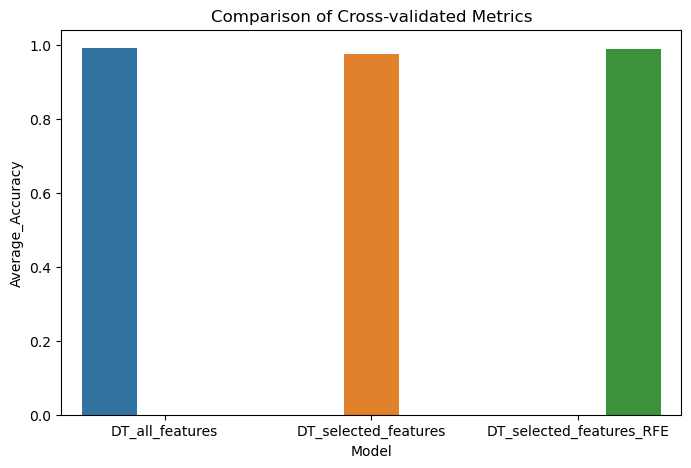

average accuracy on all feature model is 0.9919563111271661
average accuracy on selected feature model is 0.9744698595315887
average accuracy on selected feature (RFE) model is 0.9898367636485986


In [94]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Accuracy', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Accuracy'][0])
print('average accuracy on selected feature model is',results_df['Average_Accuracy'][1])
print('average accuracy on selected feature (RFE) model is',results_df['Average_Accuracy'][2])

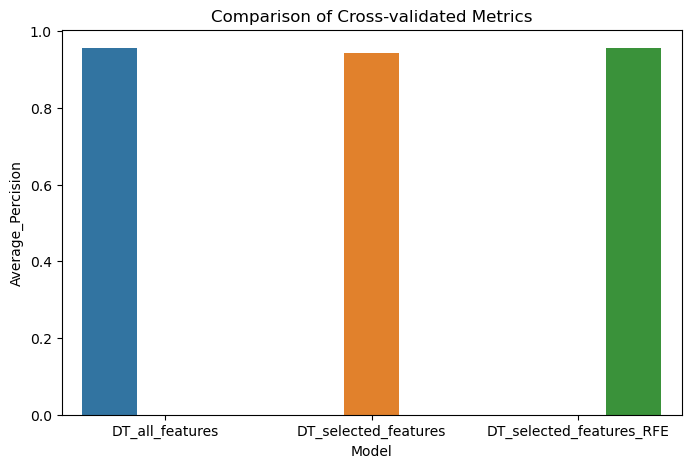

average accuracy on all feature model is 0.9558573113749118
average accuracy on selected feature model is 0.9431055406764246
average accuracy on selected feature (RFE) model is 0.9564855464726906


In [95]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Percision', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Percision'][0])
print('average accuracy on selected feature model is',results_df['Average_Percision'][1])
print('average accuracy on selected feature (RFE) model is',results_df['Average_Percision'][2])

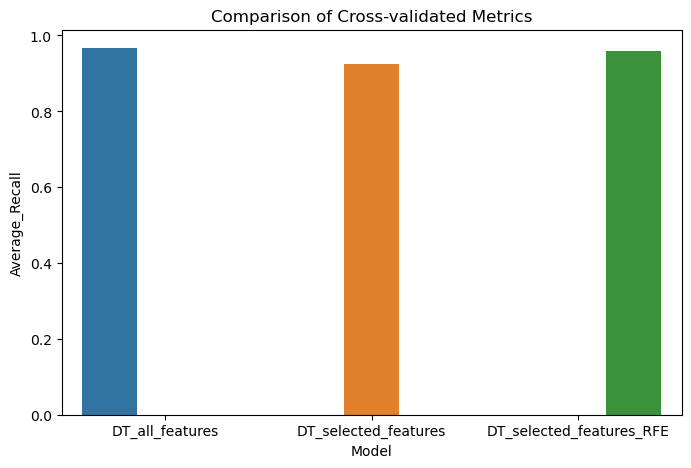

average accuracy on all feature model is 0.967118984460099
average accuracy on selected feature model is 0.9239522899213539
average accuracy on selected feature (RFE) model is 0.959496336824286


In [96]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Recall', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Recall'][0])
print('average accuracy on selected feature model is',results_df['Average_Recall'][1])
print('average accuracy on selected feature (RFE) model is',results_df['Average_Recall'][2])

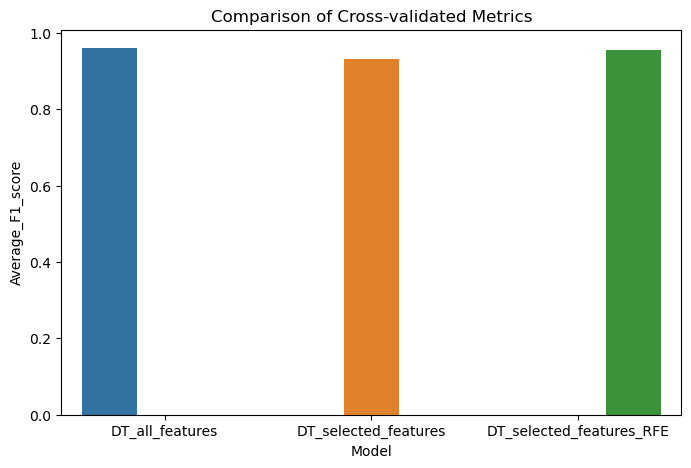

average accuracy on all feature model is 0.9604357992895152
average accuracy on selected feature model is 0.9316454603759226
average accuracy on selected feature (RFE) model is 0.9559346981165212


In [97]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_F1_score', hue='Model', data=results_df)
#plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), fancybox=True, shadow=True, ncol=2)
plt.legend().remove()
plt.title('Comparison of Cross-validated Metrics')
plt.show()
print('average accuracy on all feature model is',results_df['Average_F1_score'][0])
print('average accuracy on selected feature model is',results_df['Average_F1_score'][1])
print('average accuracy on selected feature (RFE) model is',results_df['Average_F1_score'][2])

### Conclusion==> the model created using all features shows better results for all type of attacks so we will consider it for the rest of the lab and we can conclure that the model using feature selection with RFE gave us better results than the other model with Anova

# Build RF model

# Classifier is trained for all features, for reduced features (ANOVA), and for reduced features (RFE), for later comparison.

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
# all features
clf1_DoS=RandomForestClassifier(random_state=0)
clf1_Probe=RandomForestClassifier(random_state=0)
clf1_R2L=RandomForestClassifier(random_state=0)
clf1_U2R=RandomForestClassifier(random_state=0)
clf1_DoS.fit(X_DoS, Y_DoS)
clf1_Probe.fit(X_Probe, Y_Probe)
clf1_R2L.fit(X_R2L, Y_R2L)
clf1_U2R.fit(X_U2R, Y_U2R)

RandomForestClassifier(random_state=0)

In [100]:
# selected features
clf1_newDoS=RandomForestClassifier(random_state=0)
clf1_newProbe=RandomForestClassifier(random_state=0)
clf1_newR2L=RandomForestClassifier(random_state=0)
clf1_newU2R=RandomForestClassifier(random_state=0)
clf1_newDoS.fit(X_newDoS, Y_DoS)
clf1_newProbe.fit(X_newProbe, Y_Probe)
clf1_newR2L.fit(X_newR2L, Y_R2L)
clf1_newU2R.fit(X_newU2R, Y_U2R)

RandomForestClassifier(random_state=0)

# Evaluation and Predictions for all feature model

# Confusion Matrices : DoS


In [101]:
Y_DoS_pred_RF=clf1_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_RF, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9670,41
1,6654,806


# Confusion Matrices : Probe


In [102]:
Y_Probe_pred_RF=clf1_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_RF, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9419,292
2,970,1451


# Confusion Matrices : R2L

In [103]:
Y_R2L_pred_RF=clf1_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_RF, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
3,2885


# Confusion Matrices : U2R

In [104]:
Y_U2R_pred_RF=clf1_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_RF, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
4,67


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS¶

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy_clf1_DoS = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_DoS: %0.5f (+/- %0.5f)" % (accuracy_clf1_DoS.mean(), accuracy_clf1_DoS.std() * 2))
precision_clf1_DoS = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf1_DoS: %0.5f (+/- %0.5f)" % (precision_clf1_DoS.mean(), precision_clf1_DoS.std() * 2))
recall_clf1_DoS = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf1_DoS.mean(), recall_clf1_DoS.std() * 2))
f_clf1_DoS = cross_val_score(clf1_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf1_DoS.mean(), f_clf1_DoS.std() * 2))

Accuracy_clf1_DoS: 0.99819 (+/- 0.00198)
Precision_clf1_DoS: 0.99866 (+/- 0.00268)
Recall: 0.99718 (+/- 0.00369)
F-measure: 0.99792 (+/- 0.00228)


# Probe

In [106]:
accuracy_clf1_Probe = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_Probe: %0.5f (+/- %0.5f)" % (accuracy_clf1_Probe.mean(), accuracy_clf1_Probe.std() * 2))
precision_clf1_Probe = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision_clf1_Probe: %0.5f (+/- %0.5f)" % (precision_clf1_Probe.mean(), precision_clf1_Probe.std() * 2))
recall_clf1_Probe = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf1_Probe.mean(), recall_clf1_Probe.std() * 2))
f_clf1_Probe = cross_val_score(clf1_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_clf1_Probe: %0.5f (+/- %0.5f)" % (f_clf1_Probe.mean(), f_clf1_Probe.std() * 2))

Accuracy_clf1_Probe: 0.99670 (+/- 0.00304)
Precision_clf1_Probe: 0.99577 (+/- 0.00456)
Recall: 0.99391 (+/- 0.00631)
F-measure_clf1_Probe: 0.99483 (+/- 0.00477)


# R2L

In [107]:
accuracy_clf1_R2L = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_R2L: %0.5f (+/- %0.5f)" % (accuracy_clf1_R2L.mean(), accuracy_clf1_R2L.std() * 2))
precision_clf1_R2L = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf1_R2L: %0.5f (+/- %0.5f)" % (precision_clf1_R2L.mean(), precision_clf1_R2L.std() * 2))
recall_clf1_R2L = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf1_R2L: %0.5f (+/- %0.5f)" % (recall_clf1_R2L.mean(), recall_clf1_R2L.std() * 2))
f_clf1_R2L = cross_val_score(clf1_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure_clf1_R2L: %0.5f (+/- %0.5f)" % (f_clf1_R2L.mean(), f_clf1_R2L.std() * 2))

Accuracy_clf1_R2L: 0.98182 (+/- 0.00773)
Precision_clf1_R2L: 0.97544 (+/- 0.01042)
Recall_clf1_R2L: 0.97298 (+/- 0.01280)
F-measure_clf1_R2L: 0.97419 (+/- 0.01101)


# U2R

In [108]:
accuracy_clf1_U2R = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_U2R: %0.5f (+/- %0.5f)" % (accuracy_clf1_U2R.mean(), accuracy_clf1_U2R.std() * 2))
precision_clf1_U2R = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf1_U2R: %0.5f (+/- %0.5f)" % (precision_clf1_U2R.mean(), precision_clf1_U2R.std() * 2))
recall_clf1_U2R = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall_clf1_U2R: %0.5f (+/- %0.5f)" % (recall_clf1_U2R.mean(), recall_clf1_U2R.std() * 2))
f_clf1_U2R = cross_val_score(clf1_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf1_U2R.mean(), f_clf1_U2R.std() * 2))


Accuracy_clf1_U2R: 0.99795 (+/- 0.00204)
Precision_clf1_U2R: 0.96125 (+/- 0.09646)
Recall_clf1_U2R: 0.88784 (+/- 0.11617)
F-measure: 0.91780 (+/- 0.08048)


# Evaluation and Predictions for selected features

# Confusion Matrices : DoS


In [109]:
Y_DoS_pred_RF_new=clf1_newDoS.predict(X_newDoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_RF_new, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9316,395
1,7173,287


# Confusion Matrices : Probe


In [110]:
Y_Probe_pred_RF_new=clf1_newProbe.predict(X_newProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_RF_new, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9530,181
2,1573,848


# Confusion Matrices : R2L

In [111]:
Y_R2L_pred_RF_new=clf1_newR2L.predict(X_newR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_RF_new, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
3,2885


# Confusion Matrices : U2R

In [112]:
Y_U2R_pred_RF_new=clf1_newU2R.predict(X_newU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_RF_new, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,65,2


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS¶

In [113]:
accuracy_clf1_newDoS = cross_val_score(clf1_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_newDoS: %0.5f (+/- %0.5f)" % (accuracy_clf1_newDoS.mean(), accuracy_clf1_newDoS.std() * 2))
precision_clf1_newDoS = cross_val_score(clf1_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf1_newDoS: %0.5f (+/- %0.5f)" % (precision_clf1_newDoS.mean(), precision_clf1_newDoS.std() * 2))
recall_clf1_newDoS = cross_val_score(clf1_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf1_newDoS: %0.5f (+/- %0.5f)" % (recall_clf1_newDoS.mean(), recall_clf1_newDoS.std() * 2))
f_clf1_newDoS = cross_val_score(clf1_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf1_newDoS: %0.5f (+/- %0.5f)" % (f_clf1_newDoS.mean(), f_clf1_newDoS.std() * 2))

Accuracy_clf1_newDoS: 0.94759 (+/- 0.00850)
Precision_clf1_newDoS: 0.94825 (+/- 0.01412)
Recall_clf1_newDoS: 0.93016 (+/- 0.00940)
F-measure_clf1_newDoS: 0.93911 (+/- 0.00970)


# Probe

In [114]:
accuracy_clf1_newProbe = cross_val_score(clf1_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_newProbe: %0.5f (+/- %0.5f)" % (accuracy_clf1_newProbe.mean(), accuracy_clf1_newProbe.std() * 2))
precision_clf1_newProbe = cross_val_score(clf1_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision_clf1_newProbe: %0.5f (+/- %0.5f)" % (precision_clf1_newProbe.mean(), precision_clf1_newProbe.std() * 2))
recall_clf1_newProbe = cross_val_score(clf1_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall_clf1_newProbe: %0.5f (+/- %0.5f)" % (recall_clf1_newProbe.mean(), recall_clf1_newProbe.std() * 2))
f_clf1_newProbe = cross_val_score(clf1_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_clf1_newProbe: %0.5f (+/- %0.5f)" % (f_clf1_newProbe.mean(), f_clf1_newProbe.std() * 2))

Accuracy_clf1_newProbe: 0.99159 (+/- 0.00575)
Precision_clf1_newProbe: 0.98799 (+/- 0.01282)
Recall_clf1_newProbe: 0.98575 (+/- 0.00808)
F-measure_clf1_newProbe: 0.98683 (+/- 0.00887)


# R2L

In [115]:
accuracy_clf1_newR2L = cross_val_score(clf1_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_newR2L: %0.5f (+/- %0.5f)" % (accuracy_clf1_newR2L.mean(), accuracy_clf1_newR2L.std() * 2))
precision_clf1_newR2L = cross_val_score(clf1_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf1_newR2L: %0.5f (+/- %0.5f)" % (precision_clf1_newR2L.mean(), precision_clf1_newR2L.std() * 2))
recall_clf1_newR2L = cross_val_score(clf1_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf1_newR2L: %0.5f (+/- %0.5f)" % (recall_clf1_newR2L.mean(), recall_clf1_newR2L.std() * 2))
f_clf1_newR2L = cross_val_score(clf1_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure_clf1_newR2L: %0.5f (+/- %0.5f)" % (f_clf1_newR2L.mean(), f_clf1_newR2L.std() * 2))

Accuracy_clf1_newR2L: 0.97475 (+/- 0.01061)
Precision_clf1_newR2L: 0.96612 (+/- 0.01562)
Recall_clf1_newR2L: 0.96219 (+/- 0.01644)
F-measure_clf1_newR2L: 0.96410 (+/- 0.01512)


# U2R

In [116]:
accuracy_clf1_newU2R = cross_val_score(clf1_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_newU2R: %0.5f (+/- %0.5f)" % (accuracy_clf1_newU2R.mean(), accuracy_clf1_newU2R.std() * 2))
precision_clf1_newU2R = cross_val_score(clf1_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf1_newU2R: %0.5f (+/- %0.5f)" % (precision_clf1_newU2R.mean(), precision_clf1_newU2R.std() * 2))
recall_clf1_newU2R = cross_val_score(clf1_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall_clf1_newU2R: %0.5f (+/- %0.5f)" % (recall_clf1_newU2R.mean(), recall_clf1_newU2R.std() * 2))
f_clf1_newU2R = cross_val_score(clf1_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure_clf1_newU2R: %0.5f (+/- %0.5f)" % (f_clf1_newU2R.mean(), f_clf1_newU2R.std() * 2))


Accuracy_clf1_newU2R: 0.99714 (+/- 0.00271)
Precision_clf1_newU2R: 0.94387 (+/- 0.11153)
Recall_clf1_newU2R: 0.83541 (+/- 0.16997)
F-measure_clf1_newU2R: 0.87579 (+/- 0.12599)


# RandomForest with selected features Using RFE

In [117]:
# selected features RFE
clf1_rfeDoS=DecisionTreeClassifier(random_state=0)
clf1_rfeProbe=DecisionTreeClassifier(random_state=0)
clf1_rfeR2L=DecisionTreeClassifier(random_state=0)
clf1_rfeU2R=DecisionTreeClassifier(random_state=0)

clf1_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf1_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf1_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf1_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

# Confusion Matrices : DoS

In [118]:
Y_DoS_pred_RF_rfe=clf1_rfeDoS.predict(X_rfeDoS_test)

In [119]:
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_RF_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9602,109
1,2625,4835


# Confusion Matrices : Probe

In [120]:
Y_Probe_pred_RF_rfe=clf_rfeProbe.predict(X_rfeProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_RF_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,8709,1002
2,944,1477


# Confusion Matrices : R2L


In [121]:
Y_R2L_pred_RF_rfe=clf_rfeR2L.predict(X_rfeR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_RF_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,3
Actual attacks,,
0,9649,62
3,2560,325


# Confusion Matrices : U2R

In [122]:
Y_U2R_pred_RF_rfe=clf_rfeU2R.predict(X_rfeU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_RF_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9706,5
4,52,15


# Cross Validation: Accuracy, Precision, Recall, F-measure¶

# DoS¶


In [123]:
accuracy_clf1_rfeDoS = cross_val_score(clf1_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_rfeDoS: %0.5f (+/- %0.5f)" % (accuracy_clf1_rfeDoS.mean(), accuracy_clf1_rfeDoS.std() * 2))
precision_clf1_rfeDoS = cross_val_score(clf1_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf1_rfeDoS: %0.5f (+/- %0.5f)" % (precision_clf1_rfeDoS.mean(), precision_clf1_rfeDoS.std() * 2))
recall_clf1_rfeDoS = cross_val_score(clf1_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf1_rfeDoS: %0.5f (+/- %0.5f)" % (recall_clf1_rfeDoS.mean(), recall_clf1_rfeDoS.std() * 2))
f_clf1_rfeDoS = cross_val_score(clf1_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf1_rfeDoS: %0.5f (+/- %0.5f)" % (f_clf1_rfeDoS.mean(), f_clf1_rfeDoS.std() * 2))



Accuracy_clf1_rfeDoS: 0.99738 (+/- 0.00267)
Precision_clf1_rfeDoS: 0.99692 (+/- 0.00492)
Recall_clf1_rfeDoS: 0.99705 (+/- 0.00356)
F-measure_clf1_rfeDoS: 0.99698 (+/- 0.00307)


# Probe¶


In [124]:
accuracy_clf1_rfeProbe = cross_val_score(clf1_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracyclf1_rfeProbe: %0.5f (+/- %0.5f)" % (accuracy_clf1_rfeProbe.mean(), accuracy_clf1_rfeProbe.std() * 2))
precision_clf1_rfeProbe = cross_val_score(clf1_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precisionclf1_rfeProbe: %0.5f (+/- %0.5f)" % (precision_clf1_rfeProbe.mean(), precision_clf1_rfeProbe.std() * 2))
recall_clf1_rfeProbe = cross_val_score(clf1_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recallclf1_rfeProbe: %0.5f (+/- %0.5f)" % (recall_clf1_rfeProbe.mean(), recall_clf1_rfeProbe.std() * 2))
f_clf1_rfeProbe = cross_val_score(clf1_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_clf1_rfeProbe: %0.5f (+/- %0.5f)" % (f_clf1_rfeProbe.mean(), f_clf1_rfeProbe.std() * 2))


Accuracyclf1_rfeProbe: 0.99085 (+/- 0.00559)
Precisionclf1_rfeProbe: 0.98674 (+/- 0.01179)
Recallclf1_rfeProbe: 0.98467 (+/- 0.01026)
F-measure_clf1_rfeProbe: 0.98566 (+/- 0.00871)


# R2L¶


In [125]:
accuracy_clf1_rfeR2L = cross_val_score(clf1_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_rfeR2L: %0.5f (+/- %0.5f)" % (accuracy_clf1_rfeR2L.mean(), accuracy_clf1_rfeR2L.std() * 2))
precision_clf1_rfeR2L = cross_val_score(clf1_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf1_rfeR2L: %0.5f (+/- %0.5f)" % (precision_clf1_rfeR2L.mean(), precision_clf1_rfeR2L.std() * 2))
recall_clf1_rfeR2L = cross_val_score(clf1_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf1_rfeR2L: %0.5f (+/- %0.5f)" % (recall_clf1_rfeR2L.mean(), recall_clf1_rfeR2L.std() * 2))
f_clf1_rfeR2L = cross_val_score(clf1_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf1_rfeR2L.mean(), f_clf1_rfeR2L.std() * 2))



Accuracy_clf1_rfeR2L: 0.97459 (+/- 0.00910)
Precision_clf1_rfeR2L: 0.96689 (+/- 0.01311)
Recall_clf1_rfeR2L: 0.96086 (+/- 0.01571)
F-measure: 0.96379 (+/- 0.01305)


# U2R¶


In [126]:
accuracy_clf1_rfeU2R = cross_val_score(clf1_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf1_rfeU2R: %0.5f (+/- %0.5f)" % (accuracy_clf1_rfeU2R.mean(), accuracy_clf1_rfeU2R.std() * 2))
precision_clf1_rfeU2R = cross_val_score(clf1_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf1_rfeU2R: %0.5f (+/- %0.5f)" % (precision_clf1_rfeU2R.mean(), precision_clf1_rfeU2R.std() * 2))
recall_clf1_rfeU2R = cross_val_score(clf1_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall_clf1_rfeU2R: %0.5f (+/- %0.5f)" % (recall_clf1_rfeU2R.mean(), recall_clf1_rfeU2R.std() * 2))
f_clf1_rfeU2R = cross_val_score(clf1_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure_clf1_rfeU2R: %0.5f (+/- %0.5f)" % (f_clf1_rfeU2R.mean(), f_clf1_rfeU2R.std() * 2))


Accuracy_clf1_rfeU2R: 0.99652 (+/- 0.00278)
Precision_clf1_rfeU2R: 0.87538 (+/- 0.15433)
Recall_clf1_rfeU2R: 0.89540 (+/- 0.14777)
F-measure_clf1_rfeU2R: 0.87731 (+/- 0.09647)


# Comparison between RF models

In [127]:
results_df = pd.DataFrame({
    'Model':  ['RF_All_Features']  + ['RF_selected_Features'] + ['RF_selected_Features_RFE'],
    'Average_Accuracy': [(accuracy_clf1_U2R.mean()+accuracy_clf1_DoS.mean()+accuracy_clf1_Probe.mean()+accuracy_clf1_R2L.mean())/4,
              (accuracy_clf1_newU2R.mean()+accuracy_clf1_newDoS.mean()+accuracy_clf1_newProbe.mean()+accuracy_clf1_newR2L.mean())/4,
              (accuracy_clf1_rfeU2R.mean()+accuracy_clf1_rfeDoS.mean()+accuracy_clf1_rfeProbe.mean()+accuracy_clf1_rfeR2L.mean())/4,
                         
             ],
    'Average_Percision': [(precision_clf1_U2R.mean()+precision_clf1_DoS.mean()+precision_clf1_Probe.mean()+precision_clf1_R2L.mean())/4,
              (precision_clf1_newU2R.mean()+precision_clf1_newDoS.mean()+precision_clf1_newProbe.mean()+precision_clf1_newR2L.mean())/4,
              (precision_clf1_rfeU2R.mean()+precision_clf1_rfeDoS.mean()+precision_clf1_rfeProbe.mean()+precision_clf1_rfeR2L.mean())/4,
                          
             ],
    'Average_Recall': [(recall_clf1_U2R.mean()+recall_clf1_DoS.mean()+recall_clf1_Probe.mean()+recall_clf1_R2L.mean())/4,
              (recall_clf1_newU2R.mean()+recall_clf1_newDoS.mean()+recall_clf1_newProbe.mean()+recall_clf1_newR2L.mean())/4,
              (recall_clf1_rfeU2R.mean()+recall_clf1_rfeDoS.mean()+recall_clf1_rfeProbe.mean()+recall_clf1_rfeR2L.mean())/4,
                       
             ],
    'Average_F1_score': [(f_clf1_U2R.mean()+f_clf1_DoS.mean()+f_clf1_Probe.mean()+f_clf1_R2L.mean())/4,
              (f_clf1_newU2R.mean()+f_clf1_newDoS.mean()+f_clf1_newProbe.mean()+f_clf1_newR2L.mean())/4,
              (f_clf1_rfeU2R.mean()+f_clf1_rfeDoS.mean()+f_clf1_rfeProbe.mean()+f_clf1_rfeR2L.mean())/4,
                         
             ],
})



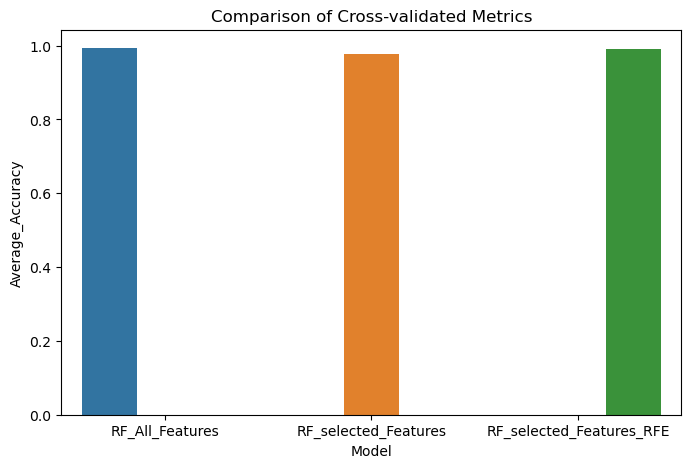

average accuracy on all feature model is 0.9936679653878239
average accuracy on selected feature model is 0.9777672183809343
average accuracy on selected feature RFE model is 0.9898367636485986


In [128]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Accuracy', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Accuracy'][0])
print('average accuracy on selected feature model is',results_df['Average_Accuracy'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Accuracy'][2])

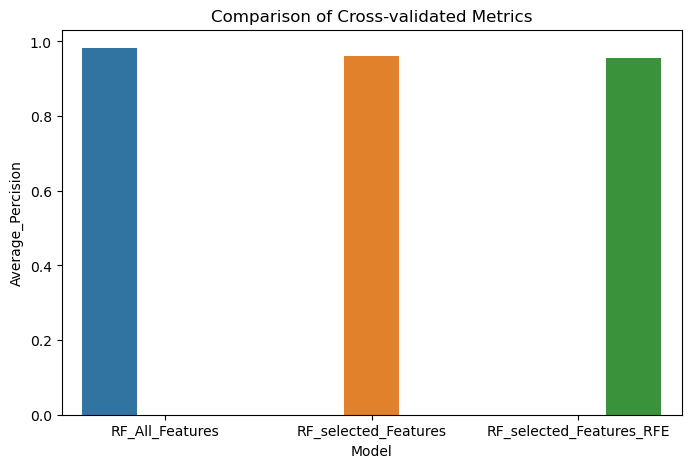

average accuracy on all feature model is 0.9827799862468909
average accuracy on selected feature model is 0.9615573190442268
average accuracy on selected feature RFE model is 0.9564855464726906


In [129]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Percision', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Percision'][0])
print('average accuracy on selected feature model is',results_df['Average_Percision'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Percision'][2])

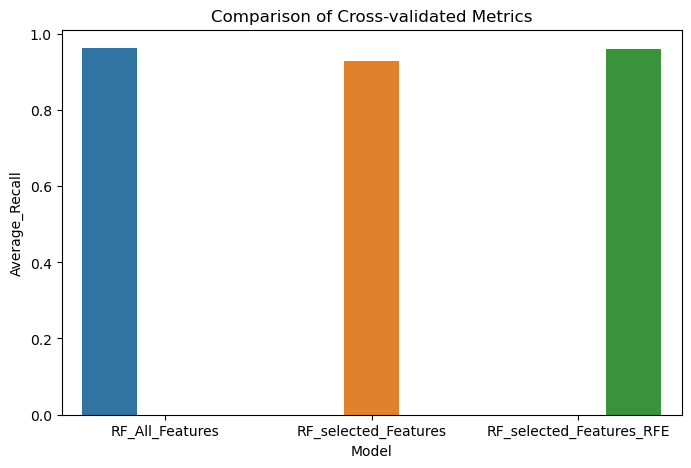

average accuracy on all feature model is 0.9629791469556
average accuracy on selected feature model is 0.9283766023089279
average accuracy on selected feature RFE model is 0.959496336824286


In [130]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Recall', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Recall'][0])
print('average accuracy on selected feature model is',results_df['Average_Recall'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Recall'][2])

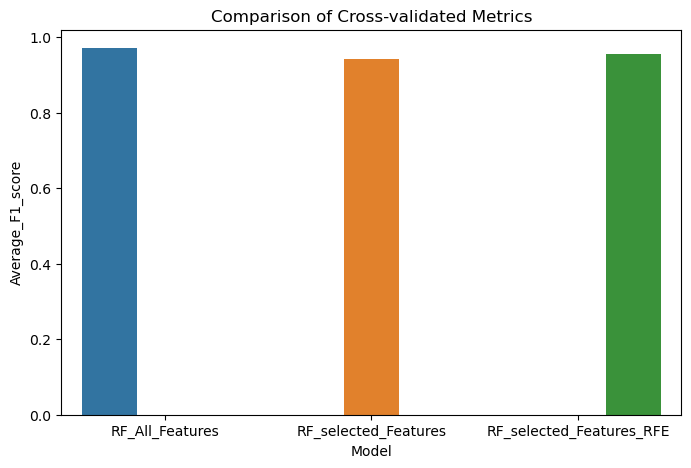

average accuracy on all feature model is 0.9711833622855168
average accuracy on selected feature model is 0.9414578296262589
average accuracy on selected feature RFE model is 0.9559346981165212


In [131]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_F1_score', hue='Model', data=results_df)
#plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), fancybox=True, shadow=True, ncol=2)
plt.legend().remove()
plt.title('Comparison of Cross-validated Metrics')
plt.show()
print('average accuracy on all feature model is',results_df['Average_F1_score'][0])
print('average accuracy on selected feature model is',results_df['Average_F1_score'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_F1_score'][2])

### Conclusion==> the model created using all features shows better results for all type of attacks so we will consider it for the rest of the lab

# KNeighbour Classifier

# Building the KNearistNeighbour Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier

# all features
clf3_DoS=KNeighborsClassifier()
clf3_Probe=KNeighborsClassifier()
clf3_R2L=KNeighborsClassifier()
clf3_U2R=KNeighborsClassifier()
clf3_DoS.fit(X_DoS, Y_DoS)
clf3_Probe.fit(X_Probe, Y_Probe)
clf3_R2L.fit(X_R2L, Y_R2L)
clf3_U2R.fit(X_U2R, Y_U2R)

KNeighborsClassifier()

# Evaluation and Predictions

# Confusion Matrices : DoS

In [133]:
Y_DoS_pred_Knn=clf3_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_Knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9422,289
1,1573,5887


# Confusion Matrices : Probe

In [134]:
Y_Probe_pred_Knn=clf3_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_Knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9437,274
2,1272,1149


# Confusion Matrices : R2L

In [135]:
Y_R2L_pred_Knn=clf3_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_Knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9706,5
3,2883,2


# Confusion Matrices : U2R

In [136]:
Y_U2R_pred_Knn=clf3_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_Knn, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,65,2


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS

In [137]:
accuracy_clf3_DoS = cross_val_score(clf3_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_DoS: %0.5f (+/- %0.5f)" % (accuracy_clf3_DoS.mean(), accuracy_clf3_DoS.std() * 2))
precision_clf3_DoS = cross_val_score(clf3_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf3_DoS: %0.5f (+/- %0.5f)" % (precision_clf3_DoS.mean(), precision_clf3_DoS.std() * 2))
recall_clf3_DoS = cross_val_score(clf3_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf3_DoS: %0.5f (+/- %0.5f)" % (recall_clf3_DoS.mean(), recall_clf3_DoS.std() * 2))
f_clf3_DoS = cross_val_score(clf3_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf3_DoS: %0.5f (+/- %0.5f)" % (f_clf3_DoS.mean(), f_clf3_DoS.std() * 2))

Accuracy_clf3_DoS: 0.99715 (+/- 0.00278)
Precision_clf3_DoS: 0.99678 (+/- 0.00383)
Recall_clf3_DoS: 0.99665 (+/- 0.00344)
F-measure_clf3_DoS: 0.99672 (+/- 0.00320)


# Probe

In [138]:
accuracy_clf3_Probe = cross_val_score(clf3_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_Probe: %0.5f (+/- %0.5f)" % (accuracy_clf3_Probe.mean(), accuracy_clf3_Probe.std() * 2))
precision_clf3_Probe = cross_val_score(clf3_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision_clf3_Probe: %0.5f (+/- %0.5f)" % (precision_clf3_Probe.mean(), precision_clf3_Probe.std() * 2))
recall_clf3_Probe = cross_val_score(clf3_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf3_Probe.mean(), recall_clf3_Probe.std() * 2))
f_clf3_Probe = cross_val_score(clf3_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_clf3_Probe: %0.5f (+/- %0.5f)" % (f_clf3_Probe.mean(), f_clf3_Probe.std() * 2))

Accuracy_clf3_Probe: 0.99077 (+/- 0.00403)
Precision_clf3_Probe: 0.98606 (+/- 0.00675)
Recall: 0.98508 (+/- 0.01137)
F-measure_clf3_Probe: 0.98553 (+/- 0.00645)


# R2L

In [139]:
accuracy_clf3_R2L = cross_val_score(clf3_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_R2L: %0.5f (+/- %0.5f)" % (accuracy_clf3_R2L.mean(), accuracy_clf3_R2L.std() * 2))
precision_clf3_R2L = cross_val_score(clf3_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf3_R2L: %0.5f (+/- %0.5f)" % (precision_clf3_R2L.mean(), precision_clf3_R2L.std() * 2))
recall_clf3_R2L = cross_val_score(clf3_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf3_R2L: %0.5f (+/- %0.5f)" % (recall_clf3_R2L.mean(), recall_clf3_R2L.std() * 2))
f_clf3_R2L = cross_val_score(clf3_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure_clf3_R2L: %0.5f (+/- %0.5f)" % (f_clf3_R2L.mean(), f_clf3_R2L.std() * 2))

Accuracy_clf3_R2L: 0.96729 (+/- 0.00741)
Precision_clf3_R2L: 0.95312 (+/- 0.01230)
Recall_clf3_R2L: 0.95454 (+/- 0.01363)
F-measure_clf3_R2L: 0.95376 (+/- 0.01052)


# U2R

In [140]:
accuracy_clf3_U2R = cross_val_score(clf3_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_U2R: %0.5f (+/- %0.5f)" % (accuracy_clf3_U2R.mean(), accuracy_clf3_U2R.std() * 2))
precision_clf3_U2R = cross_val_score(clf3_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf3_U2R: %0.5f (+/- %0.5f)" % (precision_clf3_U2R.mean(), precision_clf3_U2R.std() * 2))
recall_clf3_U2R = cross_val_score(clf3_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall_clf3_U2R: %0.5f (+/- %0.5f)" % (recall_clf3_U2R.mean(), recall_clf3_U2R.std() * 2))
f_clf3_U2R = cross_val_score(clf3_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure_clf3_U2R: %0.5f (+/- %0.5f)" % (f_clf3_U2R.mean(), f_clf3_U2R.std() * 2))


Accuracy_clf3_U2R: 0.99703 (+/- 0.00281)
Precision_clf3_U2R: 0.93143 (+/- 0.14679)
Recall_clf3_U2R: 0.85073 (+/- 0.17639)
F-measure_clf3_U2R: 0.87831 (+/- 0.11390)


# Building the KNearistNeighbour Classifier with selected features

In [141]:
from sklearn.neighbors import KNeighborsClassifier

# all features
clf3_newDoS=KNeighborsClassifier()
clf3_newProbe=KNeighborsClassifier()
clf3_newR2L=KNeighborsClassifier()
clf3_newU2R=KNeighborsClassifier()
clf3_newDoS.fit(X_newDoS, Y_DoS)
clf3_newProbe.fit(X_newProbe, Y_Probe)
clf3_newR2L.fit(X_newR2L, Y_R2L)
clf3_newU2R.fit(X_newU2R, Y_U2R)

KNeighborsClassifier()

# Evaluation and Predictions

# Confusion Matrices : DoS

In [142]:
Y_DoS_pred_clf3_newDoS=clf3_newDoS.predict(X_newDoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_clf3_newDoS, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9239,472
1,3353,4107


# Confusion Matrices : Probe

In [143]:
Y_Probe_pred_clf3_newProbe=clf3_newProbe.predict(X_newProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_clf3_newProbe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9497,214
2,1453,968


# Confusion Matrices : R2L

In [144]:
Y_R2L_pred_clf3_newR2L=clf3_newR2L.predict(X_newR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_clf3_newR2L, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9708,3
3,2885,0


# Confusion Matrices : U2R

In [145]:
Y_U2R_pred_clf3_newU2R=clf3_newU2R.predict(X_newU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_clf3_newU2R, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,64,3


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS

In [146]:
accuracy_clf3_newDoS = cross_val_score(clf3_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_newDoS: %0.5f (+/- %0.5f)" % (accuracy_clf3_newDoS.mean(), accuracy_clf3_newDoS.std() * 2))
precision_clf3_newDoS = cross_val_score(clf3_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf3_newDoS: %0.5f (+/- %0.5f)" % (precision_clf3_newDoS.mean(), precision_clf3_newDoS.std() * 2))
recall_clf3_newDoS = cross_val_score(clf3_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf3_newDoS: %0.5f (+/- %0.5f)" % (recall_clf3_newDoS.mean(), recall_clf3_newDoS.std() * 2))
f_clf3_newDoS = cross_val_score(clf3_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf3_newDoS: %0.5f (+/- %0.5f)" % (f_clf3_newDoS.mean(), f_clf3_newDoS.std() * 2))

Accuracy_clf3_newDoS: 0.93856 (+/- 0.00980)
Precision_clf3_newDoS: 0.93031 (+/- 0.01468)
Recall_clf3_newDoS: 0.92815 (+/- 0.01094)
F-measure_clf3_newDoS: 0.92922 (+/- 0.01114)


# Probe

In [147]:
accuracy_clf3_newProbe = cross_val_score(clf3_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_newProbe: %0.5f (+/- %0.5f)" % (accuracy_clf3_newProbe.mean(), accuracy_clf3_newProbe.std() * 2))
precision_clf3_newProbe = cross_val_score(clf3_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_clf3_newProbe.mean(), precision_clf3_newProbe.std() * 2))
recall_clf3_newProbe = cross_val_score(clf3_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf3_newProbe.mean(), recall_clf3_newProbe.std() * 2))
f_clf3_newProbe = cross_val_score(clf3_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf3_newProbe.mean(), f_clf3_newProbe.std() * 2))

Accuracy_clf3_newProbe: 0.98434 (+/- 0.01013)
Precision: 0.97371 (+/- 0.01565)
Recall: 0.97751 (+/- 0.01639)
F-measure: 0.97559 (+/- 0.01576)


# R2L

In [148]:
accuracy_clf3_newR2L = cross_val_score(clf3_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_newR2L: %0.5f (+/- %0.5f)" % (accuracy_clf3_newR2L.mean(), accuracy_clf3_newR2L.std() * 2))
precision_clf3_newR2L = cross_val_score(clf3_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf3_newR2L: %0.5f (+/- %0.5f)" % (precision_clf3_newR2L.mean(), precision_clf3_newR2L.std() * 2))
recall_clf3_newR2L = cross_val_score(clf3_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf3_newR2L: %0.5f (+/- %0.5f)" % (recall_clf3_newR2L.mean(), recall_clf3_newR2L.std() * 2))
f_clf3_newR2L = cross_val_score(clf3_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf3_newR2L.mean(), f_clf3_newR2L.std() * 2))

Accuracy_clf3_newR2L: 0.93689 (+/- 0.00745)
Precision_clf3_newR2L: 0.91067 (+/- 0.01183)
Recall_clf3_newR2L: 0.91083 (+/- 0.01472)
F-measure: 0.91066 (+/- 0.01072)


# U2R

In [149]:
accuracy_clf3_newU2R = cross_val_score(clf3_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_newU2R: %0.5f (+/- %0.5f)" % (accuracy_clf3_newU2R.mean(), accuracy_clf3_newU2R.std() * 2))
precision_clf3_newU2R = cross_val_score(clf3_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf3_newU2R: %0.5f (+/- %0.5f)" % (precision_clf3_newU2R.mean(), precision_clf3_newU2R.std() * 2))
recall_clf3_newU2R = cross_val_score(clf3_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf3_newU2R.mean(), recall_clf3_newU2R.std() * 2))
f_clf3_newU2R = cross_val_score(clf3_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf3_newU2R.mean(), f_clf3_newU2R.std() * 2))


Accuracy_clf3_newU2R: 0.99622 (+/- 0.00243)
Precision_clf3_newU2R: 0.92834 (+/- 0.11869)
Recall: 0.77702 (+/- 0.14080)
F-measure: 0.83050 (+/- 0.11008)


# Building the KNearistNeighbour Classifier with RFE feature selected

In [150]:
clf3_rfeDoS=KNeighborsClassifier()
clf3_rfeProbe=KNeighborsClassifier()
clf3_rfeR2L=KNeighborsClassifier()
clf3_rfeU2R=KNeighborsClassifier()
clf3_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf3_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf3_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf3_rfeU2R.fit(X_rfeU2R, Y_U2R)

KNeighborsClassifier()

# Evaluation and Predictions

# Confusion Matrices : DoS

In [151]:
Y_DoS_pred_Knn_rfe=clf3_rfeDoS.predict(X_rfeDoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_Knn_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9653,58
1,2645,4815


# Confusion Matrices : Probe

In [152]:
Y_Probe_pred_Knn_rfe=clf3_rfeProbe.predict(X_rfeProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_Knn_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9107,604
2,943,1478


# Confusion Matrices : R2L

In [153]:
Y_R2L_pred_Knn_rfe=clf3_rfeR2L.predict(X_rfeR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_Knn_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9710,1
3,2885,0


# Confusion Matrices : U2R

In [154]:
Y_U2R_pred_Knn_rfe=clf3_rfeU2R.predict(X_rfeU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_Knn_rfe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9709,2
4,60,7


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS

In [155]:
accuracy_clf3_rfeDoS = cross_val_score(clf3_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_rfeDos: %0.5f (+/- %0.5f)" % (accuracy_clf3_rfeDoS.mean(), accuracy_clf3_rfeDoS.std() * 2))
precision_clf3_rfeDoS = cross_val_score(clf3_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf3_rfeDos: %0.5f (+/- %0.5f)" % (precision_clf3_rfeDoS.mean(), precision_clf3_rfeDoS.std() * 2))
recall_clf3_rfeDoS = cross_val_score(clf3_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf3_rfeDos: %0.5f (+/- %0.5f)" % (recall_clf3_rfeDoS.mean(), recall_clf3_rfeDoS.std() * 2))
f_clf3_rfeDoS = cross_val_score(clf3_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf3_rfeDos: %0.5f (+/- %0.5f)" % (f_clf3_rfeDoS.mean(), f_clf3_rfeDoS.std() * 2))

Accuracy_clf3_rfeDos: 0.98119 (+/- 0.00598)
Precision_clf3_rfeDos: 0.98088 (+/- 0.00817)
Recall_clf3_rfeDos: 0.97574 (+/- 0.00999)
F-measure_clf3_rfeDos: 0.97829 (+/- 0.00693)


# Probe

In [156]:
accuracy_clf3_rfeProbe = cross_val_score(clf3_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_rfeProbe: %0.5f (+/- %0.5f)" % (accuracy_clf3_rfeProbe.mean(), accuracy_clf3_rfeProbe.std() * 2))
precision_clf3_rfeProbe = cross_val_score(clf3_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision_clf3_rfeProbe: %0.5f (+/- %0.5f)" % (precision_clf3_rfeProbe.mean(), precision_clf3_rfeProbe.std() * 2))
recall_clf3_rfeProbe = cross_val_score(clf3_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall_clf3_rfeProbe: %0.5f (+/- %0.5f)" % (recall_clf3_rfeProbe.mean(), recall_clf3_rfeProbe.std() * 2))
f_clf3_rfeProbe = cross_val_score(clf3_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure_clf3_rfeProbe: %0.5f (+/- %0.5f)" % (f_clf3_rfeProbe.mean(), f_clf3_rfeProbe.std() * 2))

Accuracy_clf3_rfeProbe: 0.98516 (+/- 0.00811)
Precision_clf3_rfeProbe: 0.97571 (+/- 0.01294)
Recall_clf3_rfeProbe: 0.97802 (+/- 0.01429)
F-measure_clf3_rfeProbe: 0.97683 (+/- 0.01265)


# R2L

In [157]:
accuracy_clf3_rfeR2L = cross_val_score(clf3_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_rfeR2L: %0.5f (+/- %0.5f)" % (accuracy_clf3_rfeR2L.mean(), accuracy_clf3_rfeR2L.std() * 2))
precision_clf3_rfeR2L = cross_val_score(clf3_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf3_rfeR2L: %0.5f (+/- %0.5f)" % (precision_clf3_rfeR2L.mean(), precision_clf3_rfeR2L.std() * 2))
recall_clf3_rfeR2L = cross_val_score(clf3_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf3_rfeR2L: %0.5f (+/- %0.5f)" % (recall_clf3_rfeR2L.mean(), recall_clf3_rfeR2L.std() * 2))
f_clf3_rfeR2L = cross_val_score(clf3_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure_clf3_rfeR2L: %0.5f (+/- %0.5f)" % (f_clf3_rfeR2L.mean(), f_clf3_rfeR2L.std() * 2))

Accuracy_clf3_rfeR2L: 0.94538 (+/- 0.00962)
Precision_clf3_rfeR2L: 0.92070 (+/- 0.00913)
Recall_clf3_rfeR2L: 0.92572 (+/- 0.02282)
F-measure_clf3_rfeR2L: 0.92307 (+/- 0.01488)


# U2R

In [158]:
accuracy_clf3_rfeU2R = cross_val_score(clf3_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf3_rfeU2R: %0.5f (+/- %0.5f)" % (accuracy_clf3_rfeU2R.mean(), accuracy_clf3_rfeU2R.std() * 2))
precision_clf3_rfeU2R = cross_val_score(clf3_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf3_rfeU2R: %0.5f (+/- %0.5f)" % (precision_clf3_rfeU2R.mean(), precision_clf3_rfeU2R.std() * 2))
recall_clf3_rfeU2R = cross_val_score(clf3_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall_clf3_rfeU2R: %0.5f (+/- %0.5f)" % (recall_clf3_rfeU2R.mean(), recall_clf3_rfeU2R.std() * 2))
f_clf3_rfeU2R = cross_val_score(clf3_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure_clf3_rfeU2R: %0.5f (+/- %0.5f)" % (f_clf3_rfeU2R.mean(), f_clf3_rfeU2R.std() * 2))

Accuracy_clf3_rfeU2R: 0.99550 (+/- 0.00228)
Precision_clf3_rfeU2R: 0.91362 (+/- 0.17268)
Recall_clf3_rfeU2R: 0.74001 (+/- 0.14883)
F-measure_clf3_rfeU2R: 0.79104 (+/- 0.11950)


# Comparison between KNN models

In [159]:
results_df = pd.DataFrame({
    'Model':  ['KNN_All_Features']  + ['KNN_selected_Features']+ ['KNN_selected_Features_RFE'],
    'Average_Accuracy': [(accuracy_clf3_U2R.mean()+accuracy_clf3_DoS.mean()+accuracy_clf3_Probe.mean()+accuracy_clf3_R2L.mean())/4,
              (accuracy_clf3_newU2R.mean()+accuracy_clf3_newDoS.mean()+accuracy_clf3_newProbe.mean()+accuracy_clf3_newR2L.mean())/4,
              (accuracy_clf3_rfeU2R.mean()+accuracy_clf3_rfeDoS.mean()+accuracy_clf3_rfeProbe.mean()+accuracy_clf3_rfeR2L.mean())/4,
                         
                         
             ],
    'Average_Percision': [(precision_clf3_U2R.mean()+precision_clf3_DoS.mean()+precision_clf3_Probe.mean()+precision_clf3_R2L.mean())/4,
              (precision_clf3_newU2R.mean()+precision_clf3_newDoS.mean()+precision_clf3_newProbe.mean()+precision_clf3_newR2L.mean())/4,
              (precision_clf3_rfeU2R.mean()+precision_clf3_rfeDoS.mean()+precision_clf3_rfeProbe.mean()+precision_clf3_rfeR2L.mean())/4,
                          
             ],
    'Average_Recall': [(recall_clf3_U2R.mean()+recall_clf3_DoS.mean()+recall_clf3_Probe.mean()+recall_clf3_R2L.mean())/4,
              (recall_clf3_newU2R.mean()+recall_clf3_newDoS.mean()+recall_clf3_newProbe.mean()+recall_clf3_newR2L.mean())/4,
              (recall_clf3_rfeU2R.mean()+recall_clf3_rfeDoS.mean()+recall_clf3_rfeProbe.mean()+recall_clf3_rfeR2L.mean())/4,
                       
             ],
    'Average_F1_score': [(f_clf3_U2R.mean()+f_clf3_DoS.mean()+f_clf3_Probe.mean()+f_clf3_R2L.mean())/4,
              (f_clf3_newU2R.mean()+f_clf3_newDoS.mean()+f_clf3_newProbe.mean()+f_clf3_newR2L.mean())/4,
              (f_clf3_rfeU2R.mean()+f_clf3_rfeDoS.mean()+f_clf3_rfeProbe.mean()+f_clf3_rfeR2L.mean())/4,
                         
             ],
})



In [160]:
results_df

,Model,Average_Accuracy,Average_Percision,Average_Recall,Average_F1_score
0,KNN_All_Features,0.988060,0.966850,0.946751,0.953579
1,KNN_selected_Features,0.964000,0.935757,0.898378,0.911491
2,KNN_selected_Features_RFE,0.976808,0.947727,0.904873,0.917309


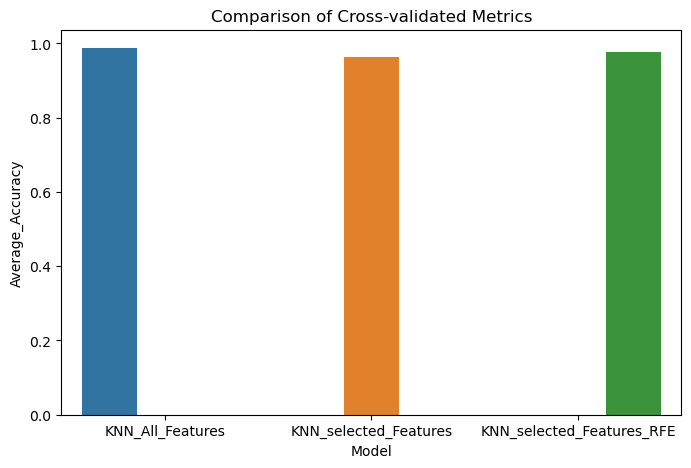

average accuracy on all feature model is 0.9880598997656727
average accuracy on selected feature model is 0.964000161464591
average accuracy on selected feature RFE model is 0.9768081629100391


In [161]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Accuracy', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Accuracy'][0])
print('average accuracy on selected feature model is',results_df['Average_Accuracy'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Accuracy'][2])

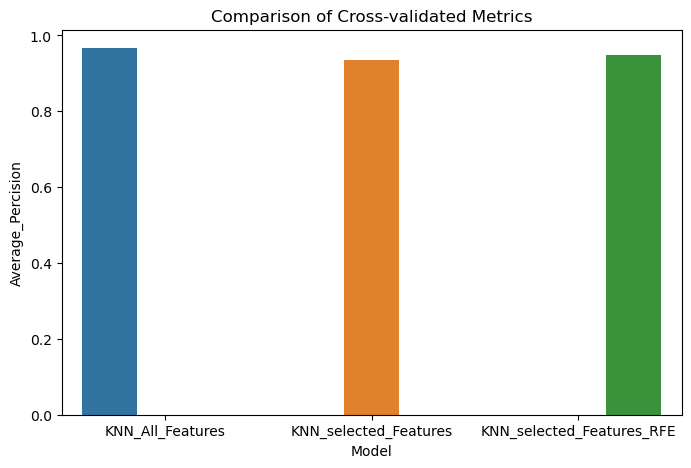

average accuracy on all feature model is 0.9668498346359529
average accuracy on selected feature model is 0.9357571130259437
average accuracy on selected feature RFE model is 0.9477267495729969


In [162]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Percision', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Percision'][0])
print('average accuracy on selected feature model is',results_df['Average_Percision'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Percision'][2])

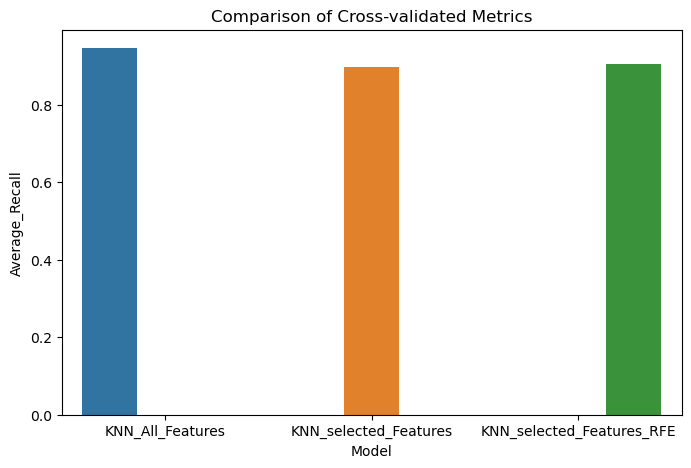

average accuracy on all feature model is 0.9467512847944887
average accuracy on selected feature model is 0.8983775837547915
average accuracy on selected feature RFE model is 0.9048729533875792


In [163]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Recall', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Recall'][0])
print('average accuracy on selected feature model is',results_df['Average_Recall'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Recall'][2])

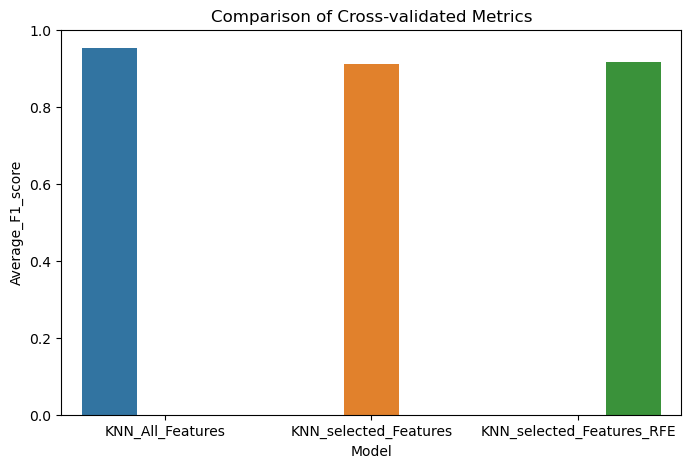

average accuracy on all feature model is 0.9535793626598257
average accuracy on selected feature model is 0.9114910358390904
average accuracy on selected feature RFE model is 0.9173087759971021


In [164]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_F1_score', hue='Model', data=results_df)
#plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), fancybox=True, shadow=True, ncol=2)
plt.legend().remove()
plt.title('Comparison of Cross-validated Metrics')
plt.show()
print('average accuracy on all feature model is',results_df['Average_F1_score'][0])
print('average accuracy on selected feature model is',results_df['Average_F1_score'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_F1_score'][2])

### Conclusion==> the model created using all features shows better results for all type of attacks so we will consider it for the rest of the lab

# Logistique regression models

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
#all features
clf4_DoS=LogisticRegression()
clf4_Probe=LogisticRegression()
clf4_R2L=LogisticRegression()
clf4_U2R=LogisticRegression()
clf4_DoS.fit(X_DoS, Y_DoS)
clf4_Probe.fit(X_Probe, Y_Probe)
clf4_R2L.fit(X_R2L, Y_R2L)
clf4_U2R.fit(X_U2R, Y_U2R)

LogisticRegression()

In [167]:
#reduced_features (anova)
clf4_newDoS=LogisticRegression()
clf4_newProbe=LogisticRegression()
clf4_newR2L=LogisticRegression()
clf4_newU2R=LogisticRegression()
clf4_newDoS.fit(X_newDoS, Y_DoS)
clf4_newProbe.fit(X_newProbe, Y_Probe)
clf4_newR2L.fit(X_newR2L, Y_R2L)
clf4_newU2R.fit(X_newU2R, Y_U2R)

LogisticRegression()

In [168]:
#reduced_features (RFE)
clf4_rfeDoS=LogisticRegression()
clf4_rfeProbe=LogisticRegression()
clf4_rfeR2L=LogisticRegression()
clf4_rfeU2R=LogisticRegression()
clf4_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf4_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf4_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf4_rfeU2R.fit(X_rfeU2R, Y_U2R)

LogisticRegression()

# Evaluation and Predictions

# Confusion Matrices : DoS

In [169]:
Y_DoS_pred_clf4_DoS=clf4_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_clf4_DoS, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9229,482
1,1218,6242


# Confusion Matrices : Probe

In [170]:
Y_Probe_pred_clf4_Probe=clf4_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_clf4_Probe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9562,149
2,1408,1013


# Confusion Matrices : R2L

In [171]:
Y_R2L_pred_clf4_R2L=clf4_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_clf4_R2L, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9648,63
3,2764,121


# Confusion Matrices : U2R

In [172]:
Y_U2R_pred_clf4_U2R=clf4_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_clf4_U2R, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9710,1
4,67,0


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS

In [173]:
accuracy_clf4_DoS = cross_val_score(clf4_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_DoS: %0.5f (+/- %0.5f)" % (accuracy_clf4_DoS.mean(), accuracy_clf4_DoS.std() * 2))
precision_clf4_DoS = cross_val_score(clf4_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf4_DoS: %0.5f (+/- %0.5f)" % (precision_clf4_DoS.mean(), precision_clf4_DoS.std() * 2))
recall_clf4_DoS = cross_val_score(clf4_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf4_DoS: %0.5f (+/- %0.5f)" % (recall_clf4_DoS.mean(), recall_clf4_DoS.std() * 2))
f_clf4_DoS = cross_val_score(clf4_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf4_DoS: %0.5f (+/- %0.5f)" % (f_clf4_DoS.mean(), f_clf4_DoS.std() * 2))

Accuracy_clf4_DoS: 0.99394 (+/- 0.00342)
Precision_clf4_DoS: 0.99093 (+/- 0.00646)
Recall_clf4_DoS: 0.99517 (+/- 0.00322)
F-measure_clf4_DoS: 0.99305 (+/- 0.00392)


# Probe

In [174]:
accuracy_clf4_Probe = cross_val_score(clf4_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_Probe: %0.5f (+/- %0.5f)" % (accuracy_clf4_Probe.mean(), accuracy_clf4_Probe.std() * 2))
precision_clf4_Probe = cross_val_score(clf4_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_clf4_Probe.mean(), precision_clf4_Probe.std() * 2))
recall_clf4_Probe = cross_val_score(clf4_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf4_Probe.mean(), recall_clf4_Probe.std() * 2))
f_clf4_Probe = cross_val_score(clf4_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf4_Probe.mean(), f_clf4_Probe.std() * 2))

Accuracy_clf4_Probe: 0.98442 (+/- 0.00534)
Precision: 0.97105 (+/- 0.01044)
Recall: 0.98096 (+/- 0.00911)
F-measure: 0.97588 (+/- 0.00825)


# R2L

In [175]:
accuracy_clf4_R2L = cross_val_score(clf4_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_newR2L: %0.5f (+/- %0.5f)" % (accuracy_clf4_R2L.mean(), accuracy_clf4_R2L.std() * 2))
precision_clf4_R2L = cross_val_score(clf4_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf4_newR2L: %0.5f (+/- %0.5f)" % (precision_clf4_R2L.mean(), precision_clf4_R2L.std() * 2))
recall_clf4_R2L = cross_val_score(clf4_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf4_newR2L: %0.5f (+/- %0.5f)" % (recall_clf4_R2L.mean(), recall_clf4_R2L.std() * 2))
f_clf4_R2L = cross_val_score(clf4_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf4_R2L.mean(), f_clf4_R2L.std() * 2))

Accuracy_clf4_newR2L: 0.96562 (+/- 0.00869)
Precision_clf4_newR2L: 0.94464 (+/- 0.01362)
Recall_clf4_newR2L: 0.96053 (+/- 0.01292)
F-measure: 0.95221 (+/- 0.01195)


# U2R

In [176]:
accuracy_clf4_U2R = cross_val_score(clf4_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_newU2R: %0.5f (+/- %0.5f)" % (accuracy_clf4_U2R.mean(), accuracy_clf4_U2R.std() * 2))
precision_clf4_U2R = cross_val_score(clf4_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf4_U2R: %0.5f (+/- %0.5f)" % (precision_clf4_U2R.mean(), precision_clf4_U2R.std() * 2))
recall_clf4_U2R = cross_val_score(clf4_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf4_U2R.mean(), recall_clf4_U2R.std() * 2))
f_clf4_U2R = cross_val_score(clf4_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf4_U2R.mean(), f_clf4_U2R.std() * 2))


Accuracy_clf4_newU2R: 0.99683 (+/- 0.00323)
Precision_clf4_U2R: 0.93066 (+/- 0.13425)
Recall: 0.83763 (+/- 0.20931)
F-measure: 0.86486 (+/- 0.15179)


# Evaluation and Predictions of selected features in LR model

# Confusion Matrices : DoS

In [177]:
Y_DoS_pred_clf4_newDoS=clf4_newDoS.predict(X_newDoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_clf4_newDoS, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,8564,1147
1,1615,5845


# Confusion Matrices : Probe

In [178]:
Y_Probe_pred_clf4_newProbe=clf4_newProbe.predict(X_newProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_clf4_newProbe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9244,467
2,1848,573


# Confusion Matrices : R2L

In [179]:
Y_R2L_pred_clf4_newR2L=clf4_newR2L.predict(X_newR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_clf4_newR2L, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9694,17
3,2878,7


# Confusion Matrices : U2R

In [180]:
Y_U2R_pred_clf4_newU2R=clf4_newU2R.predict(X_newU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_clf4_newU2R, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9710,1
4,67,0


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS

In [181]:
accuracy_clf4_newDoS = cross_val_score(clf4_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_newDoS: %0.5f (+/- %0.5f)" % (accuracy_clf4_newDoS.mean(), accuracy_clf4_newDoS.std() * 2))
precision_clf4_newDoS = cross_val_score(clf4_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf4_newDoS: %0.5f (+/- %0.5f)" % (precision_clf4_newDoS.mean(), precision_clf4_newDoS.std() * 2))
recall_clf4_newDoS = cross_val_score(clf4_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf4_newDoS: %0.5f (+/- %0.5f)" % (recall_clf4_newDoS.mean(), recall_clf4_newDoS.std() * 2))
f_clf4_newDoS = cross_val_score(clf4_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf4_newDoS: %0.5f (+/- %0.5f)" % (f_clf4_newDoS.mean(), f_clf4_newDoS.std() * 2))

Accuracy_clf4_newDoS: 0.86052 (+/- 0.01419)
Precision_clf4_newDoS: 0.90696 (+/- 0.01978)
Recall_clf4_newDoS: 0.75670 (+/- 0.03295)
F-measure_clf4_newDoS: 0.82491 (+/- 0.02015)


# Probe

In [182]:
accuracy_clf4_newProbe = cross_val_score(clf4_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_newProbe: %0.5f (+/- %0.5f)" % (accuracy_clf4_newProbe.mean(), accuracy_clf4_newProbe.std() * 2))
precision_clf4_newProbe = cross_val_score(clf4_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_clf4_newProbe.mean(), precision_clf4_newProbe.std() * 2))
recall_clf4_newProbe = cross_val_score(clf4_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf4_newProbe.mean(), recall_clf4_newProbe.std() * 2))
f_clf4_newProbe = cross_val_score(clf4_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf4_newProbe.mean(), f_clf4_newProbe.std() * 2))

Accuracy_clf4_newProbe: 0.96052 (+/- 0.00873)
Precision: 0.93612 (+/- 0.01706)
Recall: 0.94123 (+/- 0.01105)
F-measure: 0.93860 (+/- 0.01307)


# R2L

In [183]:
accuracy_clf4_newR2L = cross_val_score(clf4_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_newR2L: %0.5f (+/- %0.5f)" % (accuracy_clf4_newR2L.mean(), accuracy_clf4_newR2L.std() * 2))
precision_clf4_newR2L = cross_val_score(clf4_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf4_newR2L: %0.5f (+/- %0.5f)" % (precision_clf4_newR2L.mean(), precision_clf4_newR2L.std() * 2))
recall_clf4_newR2L = cross_val_score(clf4_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf4_newR2L: %0.5f (+/- %0.5f)" % (recall_clf4_newR2L.mean(), recall_clf4_newR2L.std() * 2))
f_clf4_newR2L = cross_val_score(clf4_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf4_newR2L.mean(), f_clf4_newR2L.std() * 2))

Accuracy_clf4_newR2L: 0.85106 (+/- 0.01684)
Precision_clf4_newR2L: 0.83776 (+/- 0.03949)
Recall_clf4_newR2L: 0.70983 (+/- 0.02919)
F-measure: 0.74463 (+/- 0.03208)


# U2R

In [184]:
accuracy_clf4_newU2R = cross_val_score(clf4_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_newU2R: %0.5f (+/- %0.5f)" % (accuracy_clf4_newU2R.mean(), accuracy_clf4_newU2R.std() * 2))
precision_clf4_newU2R = cross_val_score(clf4_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf4_newU2R: %0.5f (+/- %0.5f)" % (precision_clf4_newU2R.mean(), precision_clf4_newU2R.std() * 2))
recall_clf4_newU2R = cross_val_score(clf4_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf4_newU2R.mean(), recall_clf4_newU2R.std() * 2))
f_clf4_newU2R = cross_val_score(clf4_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf4_newU2R.mean(), f_clf4_newU2R.std() * 2))


Accuracy_clf4_newU2R: 0.99570 (+/- 0.00178)
Precision_clf4_newU2R: 0.94232 (+/- 0.14099)
Recall: 0.73064 (+/- 0.17498)
F-measure: 0.78864 (+/- 0.11777)


# Evaluation and Predictions of selected features in LR model

# Confusion Matrices : DoS

In [185]:
Y_DoS_pred_clf4_rfeDoS=clf4_rfeDoS.predict(X_rfeDoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_clf4_rfeDoS, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9594,117
1,2044,5416


# Confusion Matrices : Probe

In [186]:
Y_Probe_pred_clf4_rfeProbe=clf4_rfeProbe.predict(X_rfeProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_clf4_rfeProbe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9684,27
2,2311,110


# Confusion Matrices : R2L

In [187]:
Y_R2L_pred_clf4_rfeR2L=clf4_rfeR2L.predict(X_rfeR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_clf4_rfeR2L, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9693,18
3,2881,4


# Confusion Matrices : U2R

In [188]:
Y_U2R_pred_clf4_rfeU2R=clf4_rfeU2R.predict(X_rfeU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_clf4_rfeU2R, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9710,1
4,67,0


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS

In [189]:
accuracy_clf4_rfeDoS = cross_val_score(clf4_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_rfeDoS: %0.5f (+/- %0.5f)" % (accuracy_clf4_rfeDoS.mean(), accuracy_clf4_rfeDoS.std() * 2))
precision_clf4_rfeDoS = cross_val_score(clf4_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf4_rfeDoS: %0.5f (+/- %0.5f)" % (precision_clf4_rfeDoS.mean(), precision_clf4_rfeDoS.std() * 2))
recall_clf4_rfeDoS = cross_val_score(clf4_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf4_rfeDoS: %0.5f (+/- %0.5f)" % (recall_clf4_rfeDoS.mean(), recall_clf4_rfeDoS.std() * 2))
f_clf4_rfeDoS = cross_val_score(clf4_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf4_rfeDoS: %0.5f (+/- %0.5f)" % (f_clf4_rfeDoS.mean(), f_clf4_rfeDoS.std() * 2))

Accuracy_clf4_rfeDoS: 0.90641 (+/- 0.02039)
Precision_clf4_rfeDoS: 0.97537 (+/- 0.00690)
Recall_clf4_rfeDoS: 0.80496 (+/- 0.05025)
F-measure_clf4_rfeDoS: 0.88178 (+/- 0.02892)


# Probe

In [190]:
accuracy_clf4_rfeProbe = cross_val_score(clf4_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_rfeProbe: %0.5f (+/- %0.5f)" % (accuracy_clf4_rfeProbe.mean(), accuracy_clf4_rfeProbe.std() * 2))
precision_clf4_rfeProbe = cross_val_score(clf4_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_clf4_rfeProbe.mean(), precision_clf4_rfeProbe.std() * 2))
recall_clf4_rfeProbe = cross_val_score(clf4_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf4_rfeProbe.mean(), recall_clf4_rfeProbe.std() * 2))
f_clf4_rfeProbe = cross_val_score(clf4_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf4_rfeProbe.mean(), f_clf4_rfeProbe.std() * 2))

Accuracy_clf4_rfeProbe: 0.94873 (+/- 0.01232)
Precision: 0.93128 (+/- 0.01573)
Recall: 0.90487 (+/- 0.02816)
F-measure: 0.91716 (+/- 0.02150)


# R2L

In [191]:
accuracy_clf4_rfeR2L = cross_val_score(clf4_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_rfeR2L: %0.5f (+/- %0.5f)" % (accuracy_clf4_rfeR2L.mean(), accuracy_clf4_rfeR2L.std() * 2))
precision_clf4_rfeR2L = cross_val_score(clf4_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf4_rfeR2L: %0.5f (+/- %0.5f)" % (precision_clf4_rfeR2L.mean(), precision_clf4_rfeR2L.std() * 2))
recall_clf4_rfeR2L = cross_val_score(clf4_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf4_rfeR2L: %0.5f (+/- %0.5f)" % (recall_clf4_rfeR2L.mean(), recall_clf4_rfeR2L.std() * 2))
f_clf4_rfeR2L = cross_val_score(clf4_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf4_rfeR2L.mean(), f_clf4_rfeR2L.std() * 2))

Accuracy_clf4_rfeR2L: 0.85392 (+/- 0.01987)
Precision_clf4_rfeR2L: 0.81322 (+/- 0.03223)
Recall_clf4_rfeR2L: 0.74324 (+/- 0.03529)
F-measure: 0.76852 (+/- 0.03532)


# U2R

In [192]:
accuracy_clf4_rfeU2R = cross_val_score(clf4_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf4_rfeU2R: %0.5f (+/- %0.5f)" % (accuracy_clf4_rfeU2R.mean(), accuracy_clf4_rfeU2R.std() * 2))
precision_clf4_rfeU2R = cross_val_score(clf4_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf4_rfeU2R: %0.5f (+/- %0.5f)" % (precision_clf4_rfeU2R.mean(), precision_clf4_rfeU2R.std() * 2))
recall_clf4_rfeU2R = cross_val_score(clf4_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf4_rfeU2R.mean(), recall_clf4_rfeU2R.std() * 2))
f_clf4_rfeU2R = cross_val_score(clf4_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf4_rfeU2R.mean(), f_clf4_rfeU2R.std() * 2))


Accuracy_clf4_rfeU2R: 0.99540 (+/- 0.00278)
Precision_clf4_rfeU2R: 0.91007 (+/- 0.16900)
Recall: 0.71631 (+/- 0.18974)
F-measure: 0.77099 (+/- 0.15793)


# Comparison between LR models

In [193]:
results_df = pd.DataFrame({
    'Model':  ['LR_All_Features']  + ['LR_selected_Features']+ ['LR_selected_Features_RFE'],
    'Average_Accuracy': [(accuracy_clf4_U2R.mean()+accuracy_clf4_DoS.mean()+accuracy_clf4_Probe.mean()+accuracy_clf4_R2L.mean())/4,
              (accuracy_clf4_newU2R.mean()+accuracy_clf4_newDoS.mean()+accuracy_clf4_newProbe.mean()+accuracy_clf4_newR2L.mean())/4,
              (accuracy_clf4_rfeU2R.mean()+accuracy_clf4_rfeDoS.mean()+accuracy_clf4_rfeProbe.mean()+accuracy_clf4_rfeR2L.mean())/4,
                         
             ],
    'Average_Percision': [(precision_clf4_U2R.mean()+precision_clf4_DoS.mean()+precision_clf4_Probe.mean()+precision_clf4_R2L.mean())/4,
              (precision_clf4_newU2R.mean()+precision_clf4_newDoS.mean()+precision_clf4_newProbe.mean()+precision_clf4_newR2L.mean())/4,
              (precision_clf4_rfeU2R.mean()+precision_clf4_rfeDoS.mean()+precision_clf4_rfeProbe.mean()+precision_clf4_rfeR2L.mean())/4,
                          
             ],
    'Average_Recall': [(recall_clf4_U2R.mean()+recall_clf4_DoS.mean()+recall_clf4_Probe.mean()+recall_clf4_R2L.mean())/4,
              (recall_clf4_newU2R.mean()+recall_clf4_newDoS.mean()+recall_clf4_newProbe.mean()+recall_clf4_newR2L.mean())/4,
              (recall_clf4_rfeU2R.mean()+recall_clf4_rfeDoS.mean()+recall_clf4_rfeProbe.mean()+recall_clf4_rfeR2L.mean())/4,
                       
             ],
    'Average_F1_score': [(f_clf4_U2R.mean()+f_clf4_DoS.mean()+f_clf4_Probe.mean()+f_clf4_R2L.mean())/4,
              (f_clf4_newU2R.mean()+f_clf4_newDoS.mean()+f_clf4_newProbe.mean()+f_clf4_newR2L.mean())/4,
              (f_clf4_rfeU2R.mean()+f_clf4_rfeDoS.mean()+f_clf4_rfeProbe.mean()+f_clf4_rfeR2L.mean())/4,
                         
             ],
})



In [194]:
results_df

,Model,Average_Accuracy,Average_Percision,Average_Recall,Average_F1_score
0,LR_All_Features,0.985205,0.959318,0.943576,0.946497
1,LR_selected_Features,0.916952,0.905791,0.784600,0.824196
2,LR_selected_Features_RFE,0.926116,0.907486,0.792345,0.834613


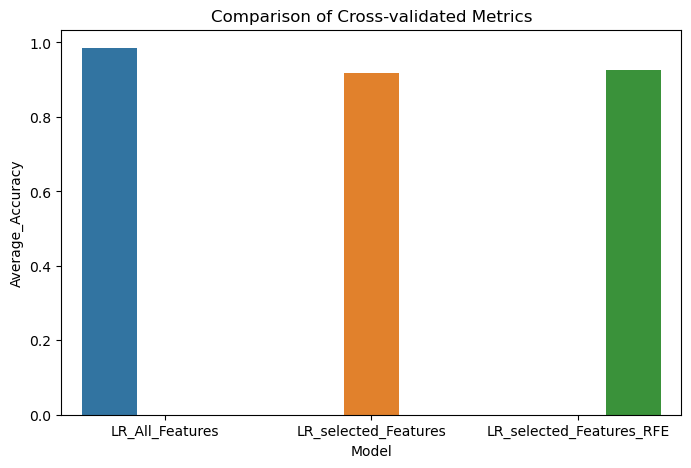

average accuracy on all feature model is 0.9852045993009108
average accuracy on selected feature model is 0.9169521336621758
average accuracy on selected feature RFE model is 0.9261156121479718


In [195]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Accuracy', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Accuracy'][0])
print('average accuracy on selected feature model is',results_df['Average_Accuracy'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Accuracy'][2])

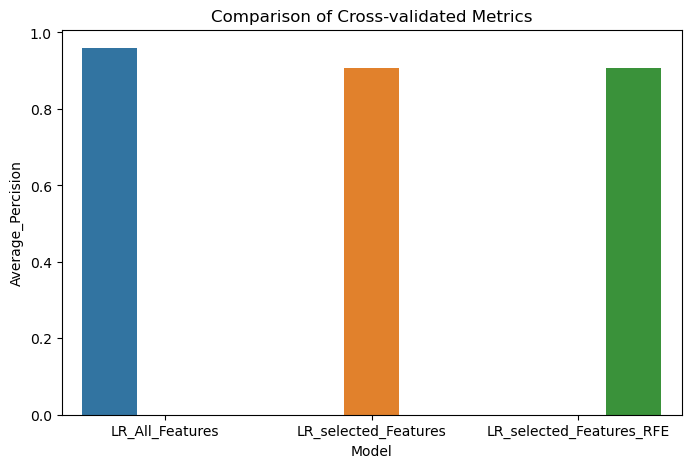

average accuracy on all feature model is 0.9593176888073418
average accuracy on selected feature model is 0.9057912953198605
average accuracy on selected feature RFE model is 0.907485884117217


In [196]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Percision', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Percision'][0])
print('average accuracy on selected feature model is',results_df['Average_Percision'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Percision'][2])

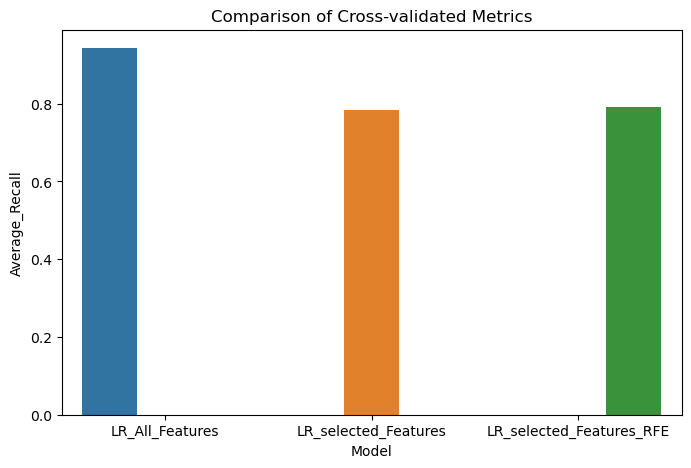

average accuracy on all feature model is 0.9435756160317127
average accuracy on selected feature model is 0.7846004914841694
average accuracy on selected feature RFE model is 0.7923446707455933


In [197]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Recall', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Recall'][0])
print('average accuracy on selected feature model is',results_df['Average_Recall'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Recall'][2])

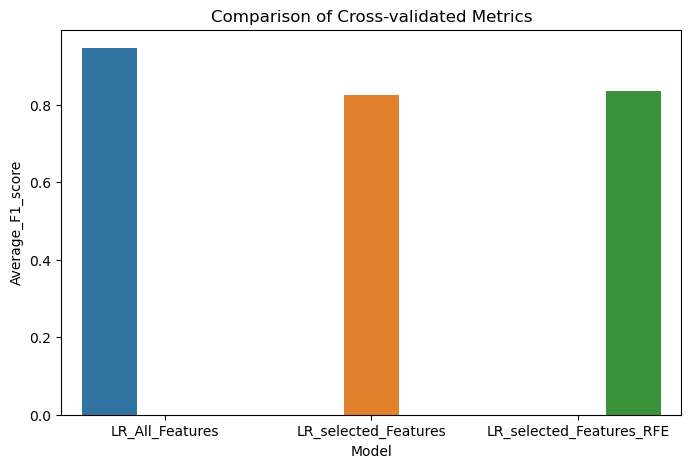

average accuracy on all feature model is 0.9464969061517574
average accuracy on selected feature model is 0.8241957784383871
average accuracy on selected feature RFE model is 0.8346125272116924


In [198]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_F1_score', hue='Model', data=results_df)
#plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), fancybox=True, shadow=True, ncol=2)
plt.legend().remove()
plt.title('Comparison of Cross-validated Metrics')
plt.show()

print('average accuracy on all feature model is',results_df['Average_F1_score'][0])
print('average accuracy on selected feature model is',results_df['Average_F1_score'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_F1_score'][2])

### Conclusion==> the model created using all features shows better results for all type of attacks so we will consider it for the rest of the lab

# SVM  models

In [199]:
from sklearn.svm import SVC

In [200]:
#ALL features
clf5_DoS= SVC()
clf5_Probe= SVC()
clf5_R2L= SVC()
clf5_U2R= SVC()
clf5_DoS.fit(X_DoS, Y_DoS)
clf5_Probe.fit(X_Probe, Y_Probe)
clf5_R2L.fit(X_R2L, Y_R2L)
clf5_U2R.fit(X_U2R, Y_U2R)

SVC()

In [201]:
#selected features from anova
clf5_newDoS= SVC()
clf5_newProbe= SVC()
clf5_newR2L= SVC()
clf5_newU2R= SVC()
clf5_newDoS.fit(X_newDoS, Y_DoS)
clf5_newProbe.fit(X_newProbe, Y_Probe)
clf5_newR2L.fit(X_newR2L, Y_R2L)
clf5_newU2R.fit(X_newU2R, Y_U2R)

SVC()

In [202]:
#selected features from RFE
clf5_rfeDoS= SVC()
clf5_rfeProbe= SVC()
clf5_rfeR2L= SVC()
clf5_rfeU2R= SVC()
clf5_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf5_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf5_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf5_rfeU2R.fit(X_rfeU2R, Y_U2R)

SVC()

# Evaluation and Predictions

# Confusion Matrices : DoS

In [203]:
Y_DoS_pred_clf5_DoS=clf5_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_clf5_DoS, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9546,165
1,2087,5373


# Confusion Matrices : Probe

In [204]:
Y_Probe_pred_clf5_Probe=clf5_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_clf5_Probe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9233,478
2,1018,1403


# Confusion Matrices : R2L

In [205]:
Y_R2L_pred_clf5_R2L=clf5_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_clf5_R2L, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9710,1
3,2883,2


# Confusion Matrices : U2R

In [206]:
Y_U2R_pred_clf5_U2R=clf5_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_clf5_U2R, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
4,67


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS

In [207]:
accuracy_clf5_DoS = cross_val_score(clf5_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_DoS: %0.5f (+/- %0.5f)" % (accuracy_clf5_DoS.mean(), accuracy_clf5_DoS.std() * 2))
precision_clf5_DoS = cross_val_score(clf5_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf5_DoS: %0.5f (+/- %0.5f)" % (precision_clf5_DoS.mean(), precision_clf5_DoS.std() * 2))
recall_clf5_DoS = cross_val_score(clf5_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf5_DoS: %0.5f (+/- %0.5f)" % (recall_clf5_DoS.mean(), recall_clf5_DoS.std() * 2))
f_clf5_DoS = cross_val_score(clf5_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf5_DoS: %0.5f (+/- %0.5f)" % (f_clf4_DoS.mean(), f_clf5_DoS.std() * 2))

Accuracy_clf5_DoS: 0.99359 (+/- 0.00368)
Precision_clf5_DoS: 0.99001 (+/- 0.00717)
Recall_clf5_DoS: 0.99531 (+/- 0.00365)
F-measure_clf5_DoS: 0.99305 (+/- 0.00420)


# Probe

In [208]:
accuracy_clf5_Probe = cross_val_score(clf5_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_Probe: %0.5f (+/- %0.5f)" % (accuracy_clf5_Probe.mean(), accuracy_clf5_Probe.std() * 2))
precision_clf5_Probe = cross_val_score(clf5_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_clf5_Probe.mean(), precision_clf5_Probe.std() * 2))
recall_clf5_Probe = cross_val_score(clf5_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf5_Probe.mean(), recall_clf5_Probe.std() * 2))
f_clf5_Probe = cross_val_score(clf5_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf5_Probe.mean(), f_clf5_Probe.std() * 2))

Accuracy_clf5_Probe: 0.98591 (+/- 0.00451)
Precision: 0.97568 (+/- 0.00782)
Recall: 0.98050 (+/- 0.00807)
F-measure: 0.97805 (+/- 0.00704)


# R2L

In [209]:
accuracy_clf5_R2L = cross_val_score(clf5_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_newR2L: %0.5f (+/- %0.5f)" % (accuracy_clf5_R2L.mean(), accuracy_clf5_R2L.std() * 2))
precision_clf5_R2L = cross_val_score(clf5_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf5_newR2L: %0.5f (+/- %0.5f)" % (precision_clf5_R2L.mean(), precision_clf5_R2L.std() * 2))
recall_clf5_R2L = cross_val_score(clf5_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf5_newR2L: %0.5f (+/- %0.5f)" % (recall_clf5_R2L.mean(), recall_clf5_R2L.std() * 2))
f_clf5_R2L = cross_val_score(clf5_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf5_R2L.mean(), f_clf5_R2L.std() * 2))

Accuracy_clf5_newR2L: 0.96745 (+/- 0.00707)
Precision_clf5_newR2L: 0.94853 (+/- 0.01089)
Recall_clf5_newR2L: 0.96110 (+/- 0.01244)
F-measure: 0.95456 (+/- 0.00985)


# U2R

In [210]:
accuracy_clf5_U2R = cross_val_score(clf5_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_newU2R: %0.5f (+/- %0.5f)" % (accuracy_clf5_U2R.mean(), accuracy_clf5_U2R.std() * 2))
precision_clf5_U2R = cross_val_score(clf5_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf5_U2R: %0.5f (+/- %0.5f)" % (precision_clf5_U2R.mean(), precision_clf5_U2R.std() * 2))
recall_clf5_U2R = cross_val_score(clf5_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf5_U2R.mean(), recall_clf5_U2R.std() * 2))
f_clf5_U2R = cross_val_score(clf5_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf5_U2R.mean(), f_clf5_U2R.std() * 2))


Accuracy_clf5_newU2R: 0.99550 (+/- 0.00277)
Precision_clf5_U2R: 0.93628 (+/- 0.17025)
Recall: 0.70218 (+/- 0.18833)
F-measure: 0.76329 (+/- 0.18724)


# Evaluation and Predictions on selected features

# Confusion Matrices : DoS

In [211]:
Y_DoS_pred_clf5_newDoS=clf5_newDoS.predict(X_newDoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_clf5_newDoS, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9261,450
1,3734,3726


# Confusion Matrices : Probe

In [212]:
Y_Probe_pred_clf5_newProbe=clf5_newProbe.predict(X_newProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_clf5_newProbe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9510,201
2,1567,854


# Confusion Matrices : R2L

In [213]:
Y_R2L_pred_clf5_newR2L=clf5_newR2L.predict(X_newR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_clf5_newR2L, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
3,2885


# Confusion Matrices : U2R

In [214]:
Y_U2R_pred_clf5_newU2R=clf5_newU2R.predict(X_newU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_clf5_newU2R, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
4,67


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS

In [215]:
accuracy_clf5_newDoS = cross_val_score(clf5_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_newDoS: %0.5f (+/- %0.5f)" % (accuracy_clf5_newDoS.mean(), accuracy_clf5_newDoS.std() * 2))
precision_clf5_newDoS = cross_val_score(clf5_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf5_newDoS: %0.5f (+/- %0.5f)" % (precision_clf5_newDoS.mean(), precision_clf5_newDoS.std() * 2))
recall_clf5_newDoS = cross_val_score(clf5_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf5_newDoS: %0.5f (+/- %0.5f)" % (recall_clf5_newDoS.mean(), recall_clf5_newDoS.std() * 2))
f_clf5_newDoS = cross_val_score(clf5_newDoS, X_newDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf5_newDoS: %0.5f (+/- %0.5f)" % (f_clf5_newDoS.mean(), f_clf5_newDoS.std() * 2))

Accuracy_clf5_newDoS: 0.89203 (+/- 0.01229)
Precision_clf5_newDoS: 0.95710 (+/- 0.01126)
Recall_clf5_newDoS: 0.78673 (+/- 0.02251)
F-measure_clf5_newDoS: 0.86356 (+/- 0.01664)


# Probe

In [216]:
accuracy_clf5_newProbe = cross_val_score(clf5_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_newProbe: %0.5f (+/- %0.5f)" % (accuracy_clf5_newProbe.mean(), accuracy_clf5_newProbe.std() * 2))
precision_clf5_newProbe = cross_val_score(clf5_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_clf5_newProbe.mean(), precision_clf5_newProbe.std() * 2))
recall_clf5_newProbe = cross_val_score(clf5_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf5_newProbe.mean(), recall_clf5_newProbe.std() * 2))
f_clf5_newProbe = cross_val_score(clf5_newProbe, X_newProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf5_newProbe.mean(), f_clf5_newProbe.std() * 2))

Accuracy_clf5_newProbe: 0.97371 (+/- 0.00781)
Precision: 0.95720 (+/- 0.01383)
Recall: 0.96094 (+/- 0.01178)
F-measure: 0.95903 (+/- 0.01191)


# R2L

In [217]:
accuracy_clf5_newR2L = cross_val_score(clf5_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_newR2L: %0.5f (+/- %0.5f)" % (accuracy_clf5_newR2L.mean(), accuracy_clf5_newR2L.std() * 2))
precision_clf5_newR2L = cross_val_score(clf5_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf5_newR2L: %0.5f (+/- %0.5f)" % (precision_clf5_newR2L.mean(), precision_clf5_newR2L.std() * 2))
recall_clf5_newR2L = cross_val_score(clf5_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf5_newR2L: %0.5f (+/- %0.5f)" % (recall_clf5_newR2L.mean(), recall_clf5_newR2L.std() * 2))
f_clf5_newR2L = cross_val_score(clf5_newR2L, X_newR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf5_newR2L.mean(), f_clf5_newR2L.std() * 2))

Accuracy_clf5_newR2L: 0.87567 (+/- 0.01431)
Precision_clf5_newR2L: 0.92320 (+/- 0.01322)
Recall_clf5_newR2L: 0.73128 (+/- 0.03063)
F-measure: 0.77802 (+/- 0.03236)


# U2R

In [218]:
accuracy_clf5_newU2R = cross_val_score(clf5_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_newU2R: %0.5f (+/- %0.5f)" % (accuracy_clf5_newU2R.mean(), accuracy_clf5_newU2R.std() * 2))
precision_clf5_newU2R = cross_val_score(clf5_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf5_newU2R: %0.5f (+/- %0.5f)" % (precision_clf5_newU2R.mean(), precision_clf5_newU2R.std() * 2))
recall_clf5_newU2R = cross_val_score(clf5_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf5_newU2R.mean(), recall_clf5_newU2R.std() * 2))
f_clf5_newU2R = cross_val_score(clf5_newU2R, X_newU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf5_newU2R.mean(), f_clf5_newU2R.std() * 2))


Accuracy_clf5_newU2R: 0.99570 (+/- 0.00238)
Precision_clf5_newU2R: 0.95222 (+/- 0.14157)
Recall: 0.71765 (+/- 0.14590)
F-measure: 0.78360 (+/- 0.15066)


# Evaluation and Predictions on selected features from RFE

# Confusion Matrices : DoS

In [219]:
Y_DoS_pred_clf5_rfeDoS=clf5_rfeDoS.predict(X_rfeDoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred_clf5_rfeDoS, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9677,34
1,3578,3882


# Confusion Matrices : Probe

In [220]:
Y_Probe_pred_clf5_rfeProbe=clf5_rfeProbe.predict(X_rfeProbe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred_clf5_rfeProbe, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9074,637
2,958,1463


# Confusion Matrices : R2L

In [221]:
Y_R2L_pred_clf_rfeR2L=clf_rfeR2L.predict(X_rfeR2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred_clf_rfeR2L, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9649,62
3,2560,325


# Confusion Matrices : U2R

In [222]:
Y_U2R_pred_clf5_rfeU2R=clf5_rfeU2R.predict(X_rfeU2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred_clf5_rfeU2R, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
4,67


# Cross Validation: Accuracy, Precision, Recall, F-measure¶


# DoS

In [223]:
accuracy_clf5_rfeDoS = cross_val_score(clf5_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_rfeDoS: %0.5f (+/- %0.5f)" % (accuracy_clf5_rfeDoS.mean(), accuracy_clf5_rfeDoS.std() * 2))
precision_clf5_rfeDoS = cross_val_score(clf5_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision_clf5_rfeDoS: %0.5f (+/- %0.5f)" % (precision_clf5_rfeDoS.mean(), precision_clf5_rfeDoS.std() * 2))
recall_clf5_rfeDoS = cross_val_score(clf5_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall_clf5_rfeDoS: %0.5f (+/- %0.5f)" % (recall_clf5_rfeDoS.mean(), recall_clf5_rfeDoS.std() * 2))
f_clf5_rfeDoS = cross_val_score(clf5_rfeDoS, X_rfeDoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure_clf5_rfeDoS: %0.5f (+/- %0.5f)" % (f_clf5_rfeDoS.mean(), f_clf5_rfeDoS.std() * 2))

Accuracy_clf5_rfeDoS: 0.93122 (+/- 0.01177)
Precision_clf5_rfeDoS: 0.98912 (+/- 0.00563)
Recall_clf5_rfeDoS: 0.85107 (+/- 0.02838)
F-measure_clf5_rfeDoS: 0.91485 (+/- 0.01592)


# Probe

In [224]:
accuracy_clf5_rfeProbe = cross_val_score(clf5_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_rfeProbe: %0.5f (+/- %0.5f)" % (accuracy_clf5_rfeProbe.mean(), accuracy_clf5_rfeProbe.std() * 2))
precision_clf5_rfeProbe = cross_val_score(clf5_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision_clf5_rfeProbe.mean(), precision_clf5_rfeProbe.std() * 2))
recall_clf5_rfeProbe = cross_val_score(clf5_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf5_rfeProbe.mean(), recall_clf5_rfeProbe.std() * 2))
f_clf5_rfeProbe = cross_val_score(clf5_rfeProbe, X_rfeProbe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf5_rfeProbe.mean(), f_clf5_rfeProbe.std() * 2))

Accuracy_clf5_rfeProbe: 0.95153 (+/- 0.01167)
Precision: 0.93788 (+/- 0.01453)
Recall: 0.90709 (+/- 0.02604)
F-measure: 0.92134 (+/- 0.02012)


# R2L

In [225]:
accuracy_clf5_rfeR2L = cross_val_score(clf5_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_rfeR2L: %0.5f (+/- %0.5f)" % (accuracy_clf5_rfeR2L.mean(), accuracy_clf5_rfeR2L.std() * 2))
precision_clf5_rfeR2L = cross_val_score(clf5_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision_clf5_rfeR2L: %0.5f (+/- %0.5f)" % (precision_clf5_rfeR2L.mean(), precision_clf5_rfeR2L.std() * 2))
recall_clf5_rfeR2L = cross_val_score(clf5_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall_clf5_rfeR2L: %0.5f (+/- %0.5f)" % (recall_clf5_rfeR2L.mean(), recall_clf5_rfeR2L.std() * 2))
f_clf5_rfeR2L = cross_val_score(clf5_rfeR2L, X_rfeR2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf5_rfeR2L.mean(), f_clf5_rfeR2L.std() * 2))

Accuracy_clf5_rfeR2L: 0.87703 (+/- 0.01306)
Precision_clf5_rfeR2L: 0.91280 (+/- 0.01200)
Recall_clf5_rfeR2L: 0.73874 (+/- 0.02762)
F-measure: 0.78416 (+/- 0.02848)


# U2R

In [226]:
accuracy_clf5_rfeU2R = cross_val_score(clf5_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy_clf5_rfeU2R: %0.5f (+/- %0.5f)" % (accuracy_clf5_rfeU2R.mean(), accuracy_clf5_rfeU2R.std() * 2))
precision_clf5_rfeU2R = cross_val_score(clf5_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision_clf5_rfeU2R: %0.5f (+/- %0.5f)" % (precision_clf5_rfeU2R.mean(), precision_clf5_rfeU2R.std() * 2))
recall_clf5_rfeU2R = cross_val_score(clf5_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall_clf5_rfeU2R.mean(), recall_clf5_rfeU2R.std() * 2))
f_clf5_rfeU2R = cross_val_score(clf5_rfeU2R, X_rfeU2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f_clf5_rfeU2R.mean(), f_clf5_rfeU2R.std() * 2))


Accuracy_clf5_rfeU2R: 0.99540 (+/- 0.00278)
Precision_clf5_rfeU2R: 0.93108 (+/- 0.30633)
Recall: 0.67257 (+/- 0.18482)
F-measure: 0.73801 (+/- 0.21884)


# Comparison between SVM models

In [227]:
results_df_SvC = pd.DataFrame({
    'Model':  ['SVC_All_Features']  + ['SVC_selected_Features']+ ['SVC_selected_Features_RFE'],
    'Average_Accuracy': [(accuracy_clf5_U2R.mean()+accuracy_clf5_DoS.mean()+accuracy_clf5_Probe.mean()+accuracy_clf5_R2L.mean())/4,
              (accuracy_clf5_newU2R.mean()+accuracy_clf5_newDoS.mean()+accuracy_clf5_newProbe.mean()+accuracy_clf5_newR2L.mean())/4,
              (accuracy_clf5_rfeU2R.mean()+accuracy_clf5_rfeDoS.mean()+accuracy_clf5_rfeProbe.mean()+accuracy_clf5_rfeR2L.mean())/4,
                         
             ],
    'Average_Percision': [(precision_clf5_U2R.mean()+precision_clf5_DoS.mean()+precision_clf5_Probe.mean()+precision_clf5_R2L.mean())/4,
              (precision_clf5_newU2R.mean()+precision_clf5_newDoS.mean()+precision_clf5_newProbe.mean()+precision_clf5_newR2L.mean())/4,
              (precision_clf5_rfeU2R.mean()+precision_clf5_rfeDoS.mean()+precision_clf5_rfeProbe.mean()+precision_clf5_rfeR2L.mean())/4,
                          
             ],
    'Average_Recall': [(recall_clf5_U2R.mean()+recall_clf5_DoS.mean()+recall_clf5_Probe.mean()+recall_clf5_R2L.mean())/4,
              (recall_clf5_newU2R.mean()+recall_clf5_newDoS.mean()+recall_clf5_newProbe.mean()+recall_clf5_newR2L.mean())/4,
              (recall_clf5_rfeU2R.mean()+recall_clf5_rfeDoS.mean()+recall_clf5_rfeProbe.mean()+recall_clf5_rfeR2L.mean())/4,
                       
             ],
    'Average_F1_score': [(f_clf5_U2R.mean()+f_clf5_DoS.mean()+f_clf5_Probe.mean()+f_clf5_R2L.mean())/4,
              (f_clf5_newU2R.mean()+f_clf5_newDoS.mean()+f_clf5_newProbe.mean()+f_clf5_newR2L.mean())/4,
              (f_clf5_rfeU2R.mean()+f_clf5_rfeDoS.mean()+f_clf5_rfeProbe.mean()+f_clf5_rfeR2L.mean())/4,
                         
             ],
})



In [228]:
results_df_SvC

,Model,Average_Accuracy,Average_Percision,Average_Recall,Average_F1_score
0,SVC_All_Features,0.985612,0.962625,0.909771,0.922137
1,SVC_selected_Features,0.934278,0.947429,0.799150,0.846053
2,SVC_selected_Features_RFE,0.938795,0.942720,0.792366,0.839589


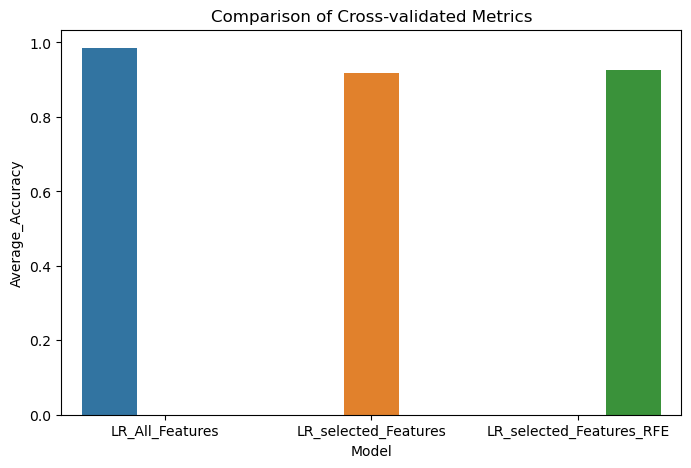

average accuracy on all feature model is 0.9852045993009108
average accuracy on selected feature model is 0.9169521336621758
average accuracy on selected feature RFE model is 0.9261156121479718


In [229]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Accuracy', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Accuracy'][0])
print('average accuracy on selected feature model is',results_df['Average_Accuracy'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Accuracy'][2])

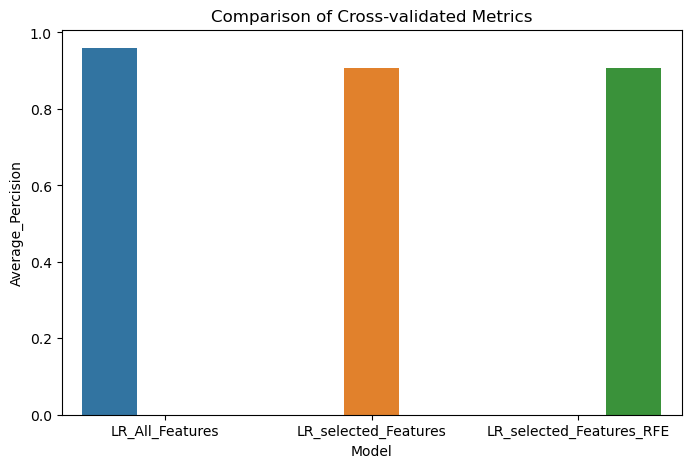

average accuracy on all feature model is 0.9593176888073418
average accuracy on selected feature model is 0.9057912953198605
average accuracy on selected feature RFE model is 0.907485884117217


In [230]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Percision', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Percision'][0])
print('average accuracy on selected feature model is',results_df['Average_Percision'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Percision'][2])

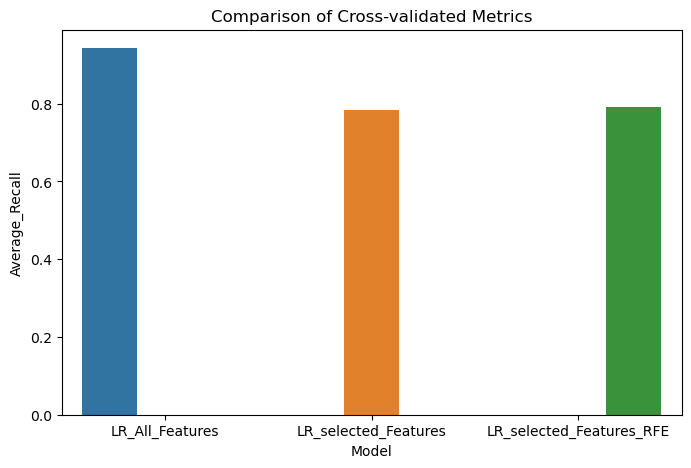

average accuracy on all feature model is 0.9435756160317127
average accuracy on selected feature model is 0.7846004914841694
average accuracy on selected feature RFE model is 0.7923446707455933


In [231]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_Recall', hue='Model', data=results_df)
plt.title('Comparison of Cross-validated Metrics')
plt.legend().remove()
plt.show()
print('average accuracy on all feature model is',results_df['Average_Recall'][0])
print('average accuracy on selected feature model is',results_df['Average_Recall'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_Recall'][2])

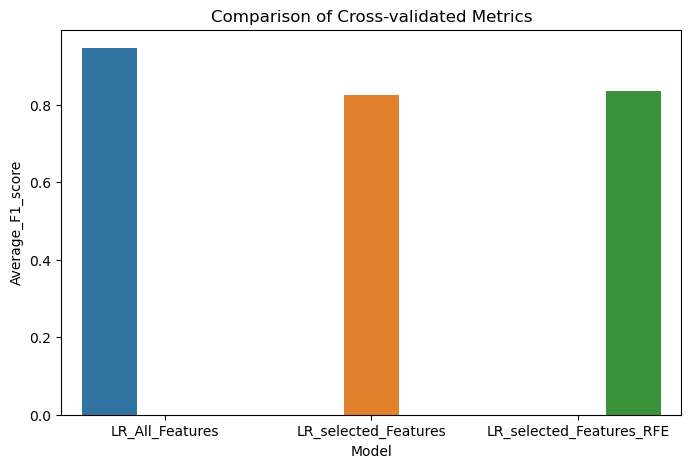

average accuracy on all feature model is 0.9464969061517574
average accuracy on selected feature model is 0.8241957784383871
average accuracy on selected feature RFE model is 0.8346125272116924


In [232]:
# Plot the results using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Average_F1_score', hue='Model', data=results_df)
#plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), fancybox=True, shadow=True, ncol=2)
plt.legend().remove()
plt.title('Comparison of Cross-validated Metrics')
plt.show()

print('average accuracy on all feature model is',results_df['Average_F1_score'][0])
print('average accuracy on selected feature model is',results_df['Average_F1_score'][1])
print('average accuracy on selected feature RFE model is',results_df['Average_F1_score'][2])

### Conclusion==> the model created using all features shows better results for all type of attacks so we will consider it for the rest of the lab

# Evaluation phase 

### In this phase we will comaper all the results from all models 

In [233]:
Average_acc_df = pd.DataFrame({
    'type':  ['Dos']  + ['Probe']+['R2L']+['U2R'],
    'KNN': [accuracy_clf3_DoS.mean(),
            accuracy_clf3_Probe.mean(),
            accuracy_clf3_R2L.mean(),
            accuracy_clf3_U2R.mean()
             ],
    'DT': [accuracy_clf_DoS.mean(),
           accuracy_clf_Probe.mean(),
           accuracy_clf_R2L.mean(),
           accuracy_clf_U2R.mean()
             ],
    'RF': [accuracy_clf1_rfeDoS.mean(),
            accuracy_clf1_rfeProbe.mean(),
           accuracy_clf1_rfeR2L.mean(),
           accuracy_clf1_rfeU2R.mean()
             ],
    'LR': [accuracy_clf4_DoS.mean(),
           accuracy_clf4_Probe.mean(),
           accuracy_clf4_R2L.mean(),
           accuracy_clf4_U2R.mean()
             ],
     'SVC': [accuracy_clf5_DoS.mean(),
           accuracy_clf5_Probe.mean(),
           accuracy_clf5_R2L.mean(),
           accuracy_clf5_U2R.mean()
             ],
})



In [234]:
Average_acc_df

,type,KNN,DT,RF,LR,SVC
0,Dos,0.997146,0.996389,0.997379,0.993943,0.993594
1,Probe,0.990768,0.995713,0.990850,0.984421,0.985905
2,R2L,0.967291,0.979199,0.974595,0.965624,0.967450
3,U2R,0.997034,0.996523,0.996523,0.996830,0.995500


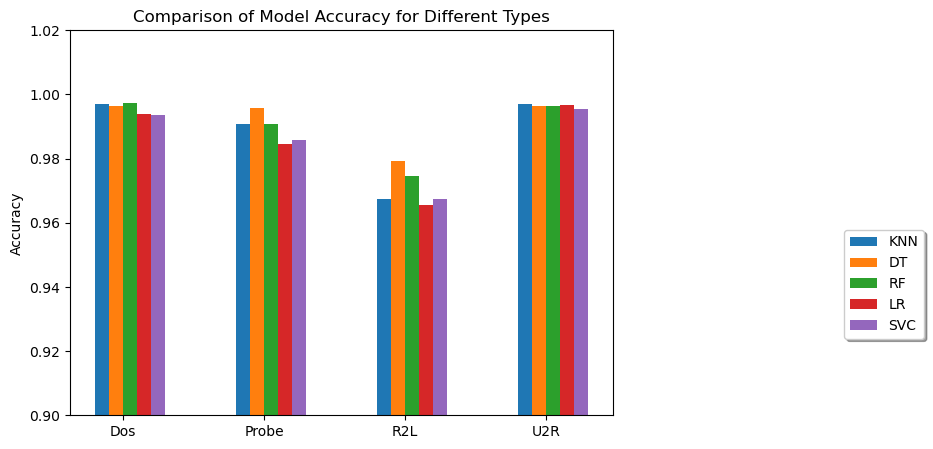

In [235]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Number of bars
n_types = len(Average_acc_df['type'])
bar_width = 0.1
bar_positions = np.arange(n_types)
#ax.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), fancybox=True, shadow=True, ncol=2)

# Plot each method's accuracy for each type
for i, method in enumerate(['KNN', 'DT', 'RF', 'LR','SVC']):
    bars = ax.bar(bar_positions + i * bar_width, Average_acc_df[method], bar_width, label=method)

# Customize the plot
ax.set_xticks(bar_positions + (bar_width * 1.5))
ax.set_xticklabels(Average_acc_df['type'])
ax.set_ylabel('Accuracy')
ax.set_ylim(0.9, 1.02)
ax.set_title('Comparison of Model Accuracy for Different Types')
ax.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), fancybox=True, shadow=True, ncol=1)


In [236]:
Avrg = pd.DataFrame({
    'Model':  ['accuracy']  + ['percision']+ ['recall']  + ['F1'],
    'KNN': [(accuracy_clf3_U2R.mean()+accuracy_clf3_DoS.mean()+accuracy_clf3_Probe.mean()+accuracy_clf3_R2L.mean())/4,
              (precision_clf3_U2R.mean()+precision_clf3_DoS.mean()+precision_clf3_Probe.mean()+precision_clf3_R2L.mean())/4,
              (recall_clf3_U2R.mean()+recall_clf3_DoS.mean()+recall_clf3_Probe.mean()+recall_clf3_R2L.mean())/4,
              (f_clf3_U2R.mean()+recall_clf3_DoS.mean()+recall_clf3_Probe.mean()+recall_clf3_R2L.mean())/4,
            
             ],
    'DT': [(accuracy_clf_U2R.mean()+accuracy_clf_DoS.mean()+accuracy_clf_Probe.mean()+accuracy_clf_R2L.mean())/4,
              (precision_clf_U2R.mean()+precision_clf_DoS.mean()+precision_clf_Probe.mean()+precision_clf_R2L.mean())/4,
              (recall_clf_U2R.mean()+recall_clf_DoS.mean()+recall_clf_Probe.mean()+recall_clf_R2L.mean())/4,
              (f_clf_U2R.mean()+recall_clf_DoS.mean()+recall_clf_Probe.mean()+recall_clf_R2L.mean())/4,
            
             ],
    'LR': [(accuracy_clf4_U2R.mean()+accuracy_clf4_DoS.mean()+accuracy_clf4_Probe.mean()+accuracy_clf4_R2L.mean())/4,
              (precision_clf4_U2R.mean()+precision_clf4_DoS.mean()+precision_clf4_Probe.mean()+precision_clf4_R2L.mean())/4,
              (recall_clf4_U2R.mean()+recall_clf4_DoS.mean()+recall_clf4_Probe.mean()+recall_clf4_R2L.mean())/4,
              (f_clf4_U2R.mean()+recall_clf4_DoS.mean()+recall_clf4_Probe.mean()+recall_clf4_R2L.mean())/4,
            
             ],
    'RF': [(accuracy_clf1_rfeU2R.mean()+accuracy_clf1_rfeDoS.mean()+accuracy_clf1_rfeProbe.mean()+accuracy_clf1_rfeR2L.mean())/4,
              (precision_clf1_rfeU2R.mean()+precision_clf1_rfeDoS.mean()+precision_clf1_rfeProbe.mean()+precision_clf1_rfeR2L.mean())/4,
              (recall_clf1_rfeU2R.mean()+recall_clf1_rfeDoS.mean()+recall_clf1_rfeProbe.mean()+recall_clf1_rfeR2L.mean())/4,
              (f_clf1_rfeU2R.mean()+recall_clf1_rfeDoS.mean()+recall_clf1_rfeProbe.mean()+recall_clf1_rfeR2L.mean())/4,
            
             ],
      'SVC': [(accuracy_clf5_U2R.mean()+accuracy_clf5_DoS.mean()+accuracy_clf5_Probe.mean()+accuracy_clf5_R2L.mean())/4,
              (precision_clf5_U2R.mean()+precision_clf5_DoS.mean()+precision_clf5_Probe.mean()+precision_clf5_R2L.mean())/4,
              (recall_clf5_U2R.mean()+recall_clf5_DoS.mean()+recall_clf5_Probe.mean()+recall_clf5_R2L.mean())/4,
              (f_clf5_U2R.mean()+recall_clf5_DoS.mean()+recall_clf5_Probe.mean()+recall_clf5_R2L.mean())/4,
            
             ],
})



In [237]:
Avrg

,Model,KNN,DT,LR,RF,SVC
0,accuracy,0.988060,0.991956,0.985205,0.989837,0.985612
1,percision,0.966850,0.955857,0.959318,0.956486,0.962625
2,recall,0.946751,0.967119,0.943576,0.959496,0.909771
3,F1,0.953648,0.960249,0.950382,0.954974,0.925050


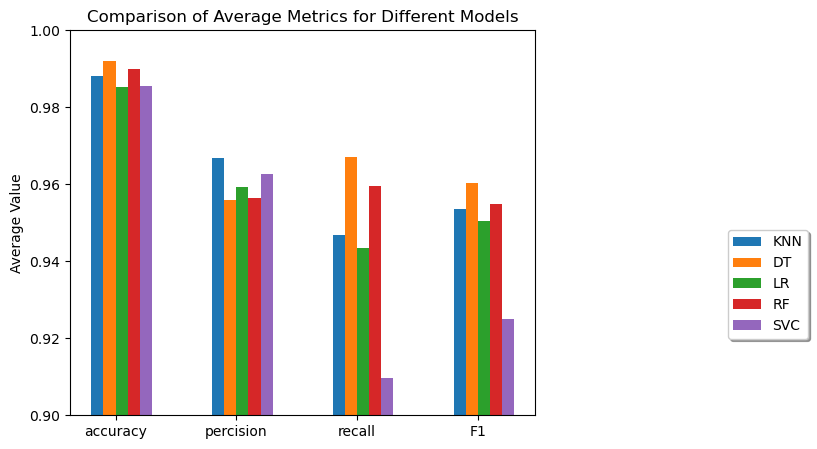

In [238]:
fig, ax = plt.subplots(figsize=(6,5))

# Number of bars
n_models = len(Avrg['Model'])
bar_width = 0.1
bar_positions = np.arange(n_models)

# Plot each model's metrics
for i, model in enumerate(['KNN', 'DT', 'LR', 'RF','SVC']):
    bars = ax.bar(bar_positions + i * bar_width, Avrg[model], bar_width, label=model)

# Customize the plot
ax.set_xticks(bar_positions + (bar_width * 1.5))
ax.set_xticklabels(Avrg['Model'])
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Average Metrics for Different Models')
ax.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), fancybox=True, shadow=True, ncol=1)
ax.set_ylim(0.9, 1)
# Show the plot
plt.show()

# Deployment 

### Here we serialized the best Machine learning model according to the choosen models into savemodel.sav to use it in a flask application for the deployment

### and while using all features will be so hard to deploy we chose to work with one of the reduced features models, for that reason we chose the models created with the RFE selected features because it gave a little bit more percision

In [239]:
#save the model 
import pickle 
filename = 'savedmodel.sav'
pickle.dump(clf_rfeDoS, open(filename, 'wb'))